<a href="https://colab.research.google.com/github/alimertgok/SIGN-LANGUAGE-DETECTION/blob/main/SIGN_LANGUAGE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Real Time Sign Language Detection***

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing libraries

In [10]:
import os
import glob
from IPython.display import display, Image
from IPython import display

In [11]:
display.clear_output()

In [12]:
HOME = os.getcwd()
print(HOME)

/content


## Installing Ultralytics and Check

In [13]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 kB 33.2 MB/s eta 0:00:00


In [14]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/107.7 GB disk)


In [15]:
from ultralytics import YOLO
from IPython.display import display, Image

# Train the YOLOv8 Model on Prepared Dataset

To train the model, you need to prepare annotated images and split them into training and validation datasets.

In [ ]:
from ultralytics import YOLO
import torch
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 212MB/s]


In [16]:
!pip install python-dotenv

In [17]:
import dotenv
import os

dotenv.load_dotenv('/content/drive/MyDrive/Colab Notebooks/SignLanguageDetection/.env')
secret_key = os.getenv('API_KEY')

In [18]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=secret_key)
project = rf.workspace("realtimeobjectdetection-gxjoc").project("sign-language-detection-y309m")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.84, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Sign-Language-Detection-2 in yolov8:: 100%|██████████| 155/155 [00:00<00:00, 4969.48it/s]


In [ ]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from YAML
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8n.yaml").load("yolov8n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data="/content/Sign-Language-Detection-2/data.yaml", epochs=50, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 75.9MB/s]


Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Sign-Language-Detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Sign-Language-Detection-2/train/labels... 58 images, 1 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<00:00, 907.77it/s]

train: New cache created: /content/Sign-Language-Detection-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Sign-Language-Detection-2/valid/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 1616.34it/s]

val: New cache created: /content/Sign-Language-Detection-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G       1.67      4.569      1.848         17        640: 100%|██████████| 4/4 [01:00<00:00, 15.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.96s/it]

                   all         15         15   0.000897        0.4    0.00579    0.00194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.469       4.39      1.671         16        640: 100%|██████████| 4/4 [00:51<00:00, 12.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.94s/it]

                   all         15         15    0.00129      0.533     0.0262     0.0101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.286       3.98      1.564         18        640: 100%|██████████| 4/4 [00:52<00:00, 13.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.04s/it]

                   all         15         15     0.0053        0.9      0.235      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.206      3.809      1.479         19        640: 100%|██████████| 4/4 [00:51<00:00, 12.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.98s/it]

                   all         15         15    0.00416        0.9      0.587      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.279       3.56      1.431         18        640: 100%|██████████| 4/4 [00:50<00:00, 12.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]

                   all         15         15      0.004      0.967      0.644      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.228      3.083      1.395         20        640: 100%|██████████| 4/4 [00:51<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.62s/it]

                   all         15         15    0.00393      0.967      0.595      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.231      2.896      1.354         16        640: 100%|██████████| 4/4 [00:51<00:00, 12.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.88s/it]

                   all         15         15    0.00405      0.967      0.551      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.195      2.941      1.285         17        640: 100%|██████████| 4/4 [00:55<00:00, 13.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.56s/it]

                   all         15         15    0.00433      0.967      0.555      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.166      2.736      1.294         18        640: 100%|██████████| 4/4 [00:50<00:00, 12.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all         15         15    0.00506      0.967      0.622      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.194      2.367      1.313         18        640: 100%|██████████| 4/4 [00:51<00:00, 12.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.53s/it]

                   all         15         15    0.00615      0.967      0.638       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.106      2.274      1.227         14        640: 100%|██████████| 4/4 [00:48<00:00, 12.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.96s/it]

                   all         15         15    0.00592      0.967      0.755      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.185      2.224      1.415         13        640: 100%|██████████| 4/4 [00:54<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.18s/it]

                   all         15         15      0.893      0.267       0.68       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.052      2.133      1.255         16        640: 100%|██████████| 4/4 [00:51<00:00, 12.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.14s/it]

                   all         15         15      0.874      0.327      0.705      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G       1.16      2.029      1.276         17        640: 100%|██████████| 4/4 [00:49<00:00, 12.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.96s/it]

                   all         15         15       0.92      0.389      0.782      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.9523      1.938       1.24         17        640: 100%|██████████| 4/4 [00:50<00:00, 12.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.21s/it]

                   all         15         15      0.751      0.393      0.807      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.058      1.933      1.211         20        640: 100%|██████████| 4/4 [00:48<00:00, 12.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.00s/it]

                   all         15         15      0.664      0.467       0.86      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.9925      2.199      1.229         16        640: 100%|██████████| 4/4 [00:51<00:00, 12.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.17s/it]

                   all         15         15      0.849      0.467      0.843      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.9824      1.687      1.138         22        640: 100%|██████████| 4/4 [00:50<00:00, 12.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.77s/it]

                   all         15         15      0.811       0.62      0.867      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.099      1.753      1.244         21        640: 100%|██████████| 4/4 [00:50<00:00, 12.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.10s/it]

                   all         15         15      0.769      0.738      0.836      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.9754      1.587      1.183         15        640: 100%|██████████| 4/4 [00:51<00:00, 12.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.27s/it]

                   all         15         15      0.801      0.522      0.834      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.019      1.714      1.262         16        640: 100%|██████████| 4/4 [00:49<00:00, 12.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.98s/it]

                   all         15         15      0.802      0.696      0.812      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.043      1.662      1.186         20        640: 100%|██████████| 4/4 [00:51<00:00, 12.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.18s/it]

                   all         15         15      0.791      0.642      0.833      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.086      1.743      1.298         25        640: 100%|██████████| 4/4 [00:53<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.89s/it]

                   all         15         15      0.762      0.545      0.846        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.066      1.734      1.256         14        640: 100%|██████████| 4/4 [00:49<00:00, 12.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.09s/it]

                   all         15         15      0.752      0.715      0.898       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.9831      1.662      1.201         17        640: 100%|██████████| 4/4 [00:51<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.32s/it]

                   all         15         15      0.727      0.825      0.964      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.082      1.757      1.313         15        640: 100%|██████████| 4/4 [00:49<00:00, 12.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.81s/it]

                   all         15         15      0.888        0.7      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.9774       1.51      1.128         20        640: 100%|██████████| 4/4 [00:49<00:00, 12.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]

                   all         15         15      0.718      0.923       0.99      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.9481      1.641      1.169         18        640: 100%|██████████| 4/4 [00:50<00:00, 12.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.72s/it]

                   all         15         15      0.834      0.883      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.011      1.692      1.225         14        640: 100%|██████████| 4/4 [00:49<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

                   all         15         15      0.831      0.884      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.9339      1.563      1.133         19        640: 100%|██████████| 4/4 [00:50<00:00, 12.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]

                   all         15         15      0.805      0.882      0.987       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.9024      1.523      1.126         18        640: 100%|██████████| 4/4 [00:50<00:00, 12.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.80s/it]

                   all         15         15      0.809      0.901      0.979      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.9097       1.47      1.106         22        640: 100%|██████████| 4/4 [00:49<00:00, 12.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]

                   all         15         15      0.872      0.934      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.8989      1.622      1.145         14        640: 100%|██████████| 4/4 [00:50<00:00, 12.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.87s/it]

                   all         15         15      0.889      0.956      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.8773      1.416      1.107         20        640: 100%|██████████| 4/4 [00:51<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]

                   all         15         15        0.9      0.958      0.995      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.8781      1.396      1.138         17        640: 100%|██████████| 4/4 [00:51<00:00, 12.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.57s/it]

                   all         15         15      0.916      0.938      0.995      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.8771      1.378       1.08         15        640: 100%|██████████| 4/4 [00:49<00:00, 12.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.44s/it]

                   all         15         15      0.895      0.948      0.995      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.8126      1.336       1.08         16        640: 100%|██████████| 4/4 [00:50<00:00, 12.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all         15         15      0.906      0.945      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9281      1.472      1.159         19        640: 100%|██████████| 4/4 [00:51<00:00, 12.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.45s/it]

                   all         15         15      0.914      0.944      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.8852      1.312      1.088         19        640: 100%|██████████| 4/4 [00:49<00:00, 12.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]

                   all         15         15      0.909      0.947      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.8327      1.311      1.051         24        640: 100%|██████████| 4/4 [00:51<00:00, 12.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]

                   all         15         15      0.909      0.947      0.995      0.756


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.7055       1.46       1.01         10        640: 100%|██████████| 4/4 [00:50<00:00, 12.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.49s/it]

                   all         15         15       0.92      0.944      0.995      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.7192       1.51      1.076         10        640: 100%|██████████| 4/4 [00:48<00:00, 12.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]

                   all         15         15      0.917      0.956      0.995      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.6924       1.47      1.037         10        640: 100%|██████████| 4/4 [00:49<00:00, 12.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]

                   all         15         15      0.933      0.955      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.6854      1.503      1.055         10        640: 100%|██████████| 4/4 [00:49<00:00, 12.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         15         15      0.939      0.961      0.995       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.6993      1.536      1.105         10        640: 100%|██████████| 4/4 [00:50<00:00, 12.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.34s/it]

                   all         15         15      0.947      0.969      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.6854      1.495      1.033         10        640: 100%|██████████| 4/4 [00:50<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.69s/it]

                   all         15         15       0.94      0.973      0.995      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.7114      1.529      1.037         10        640: 100%|██████████| 4/4 [00:49<00:00, 12.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all         15         15      0.934      0.972      0.995      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.6961      1.468      1.078         10        640: 100%|██████████| 4/4 [00:50<00:00, 12.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.47s/it]

                   all         15         15      0.936      0.971      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G       0.65      1.436      1.041         10        640: 100%|██████████| 4/4 [00:48<00:00, 12.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.98s/it]

                   all         15         15      0.932      0.973      0.995      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      0.669      1.392      1.044         10        640: 100%|██████████| 4/4 [00:50<00:00, 12.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.21s/it]

                   all         15         15      0.932      0.973      0.995      0.764



50 epochs completed in 0.783 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]


                   all         15         15      0.907      0.945      0.995      0.792
                 hello          1          1      0.754          1      0.995      0.895
              iloveyou          2          2       0.87          1      0.995      0.846
                    no          3          3       0.91          1      0.995      0.797
                thanks          3          3          1      0.874      0.995      0.796
                   yes          6          6          1      0.851      0.995      0.628
Speed: 2.5ms preprocess, 227.7ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to runs/detect/train


# Train2 (first time trained)

## Confusion Matrix

/content


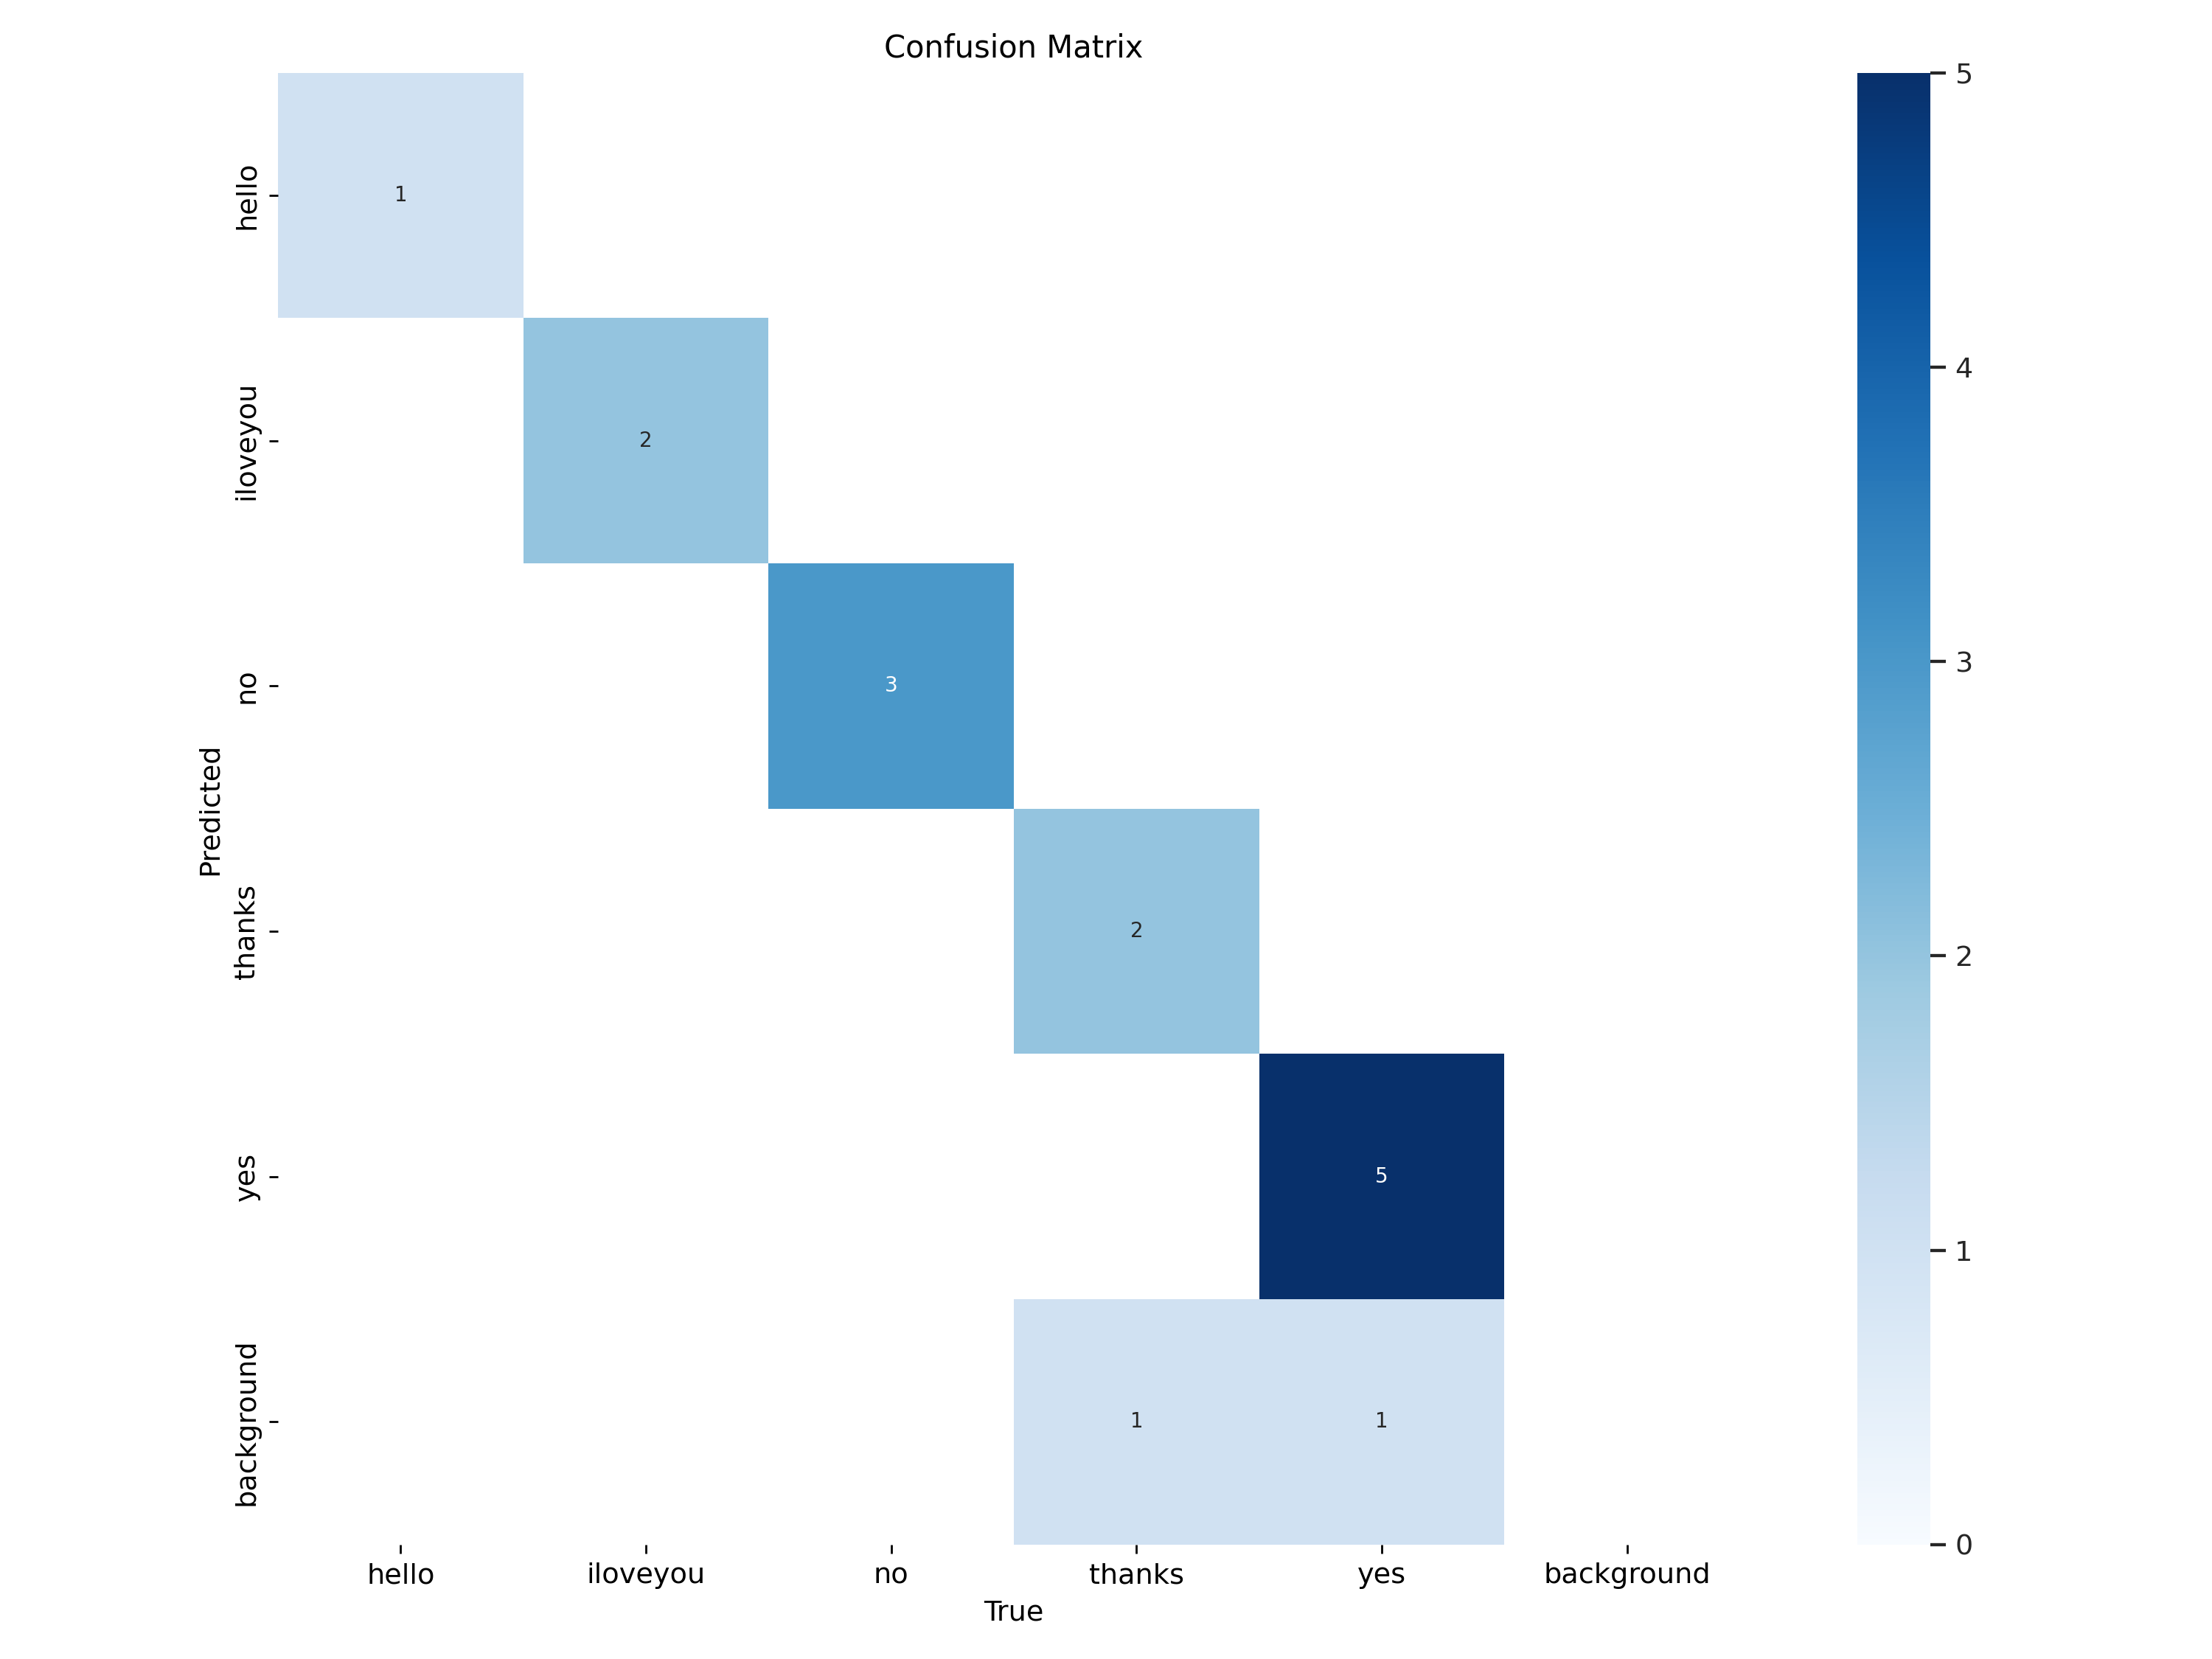

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=900)

## Training and Validation Loss

/content


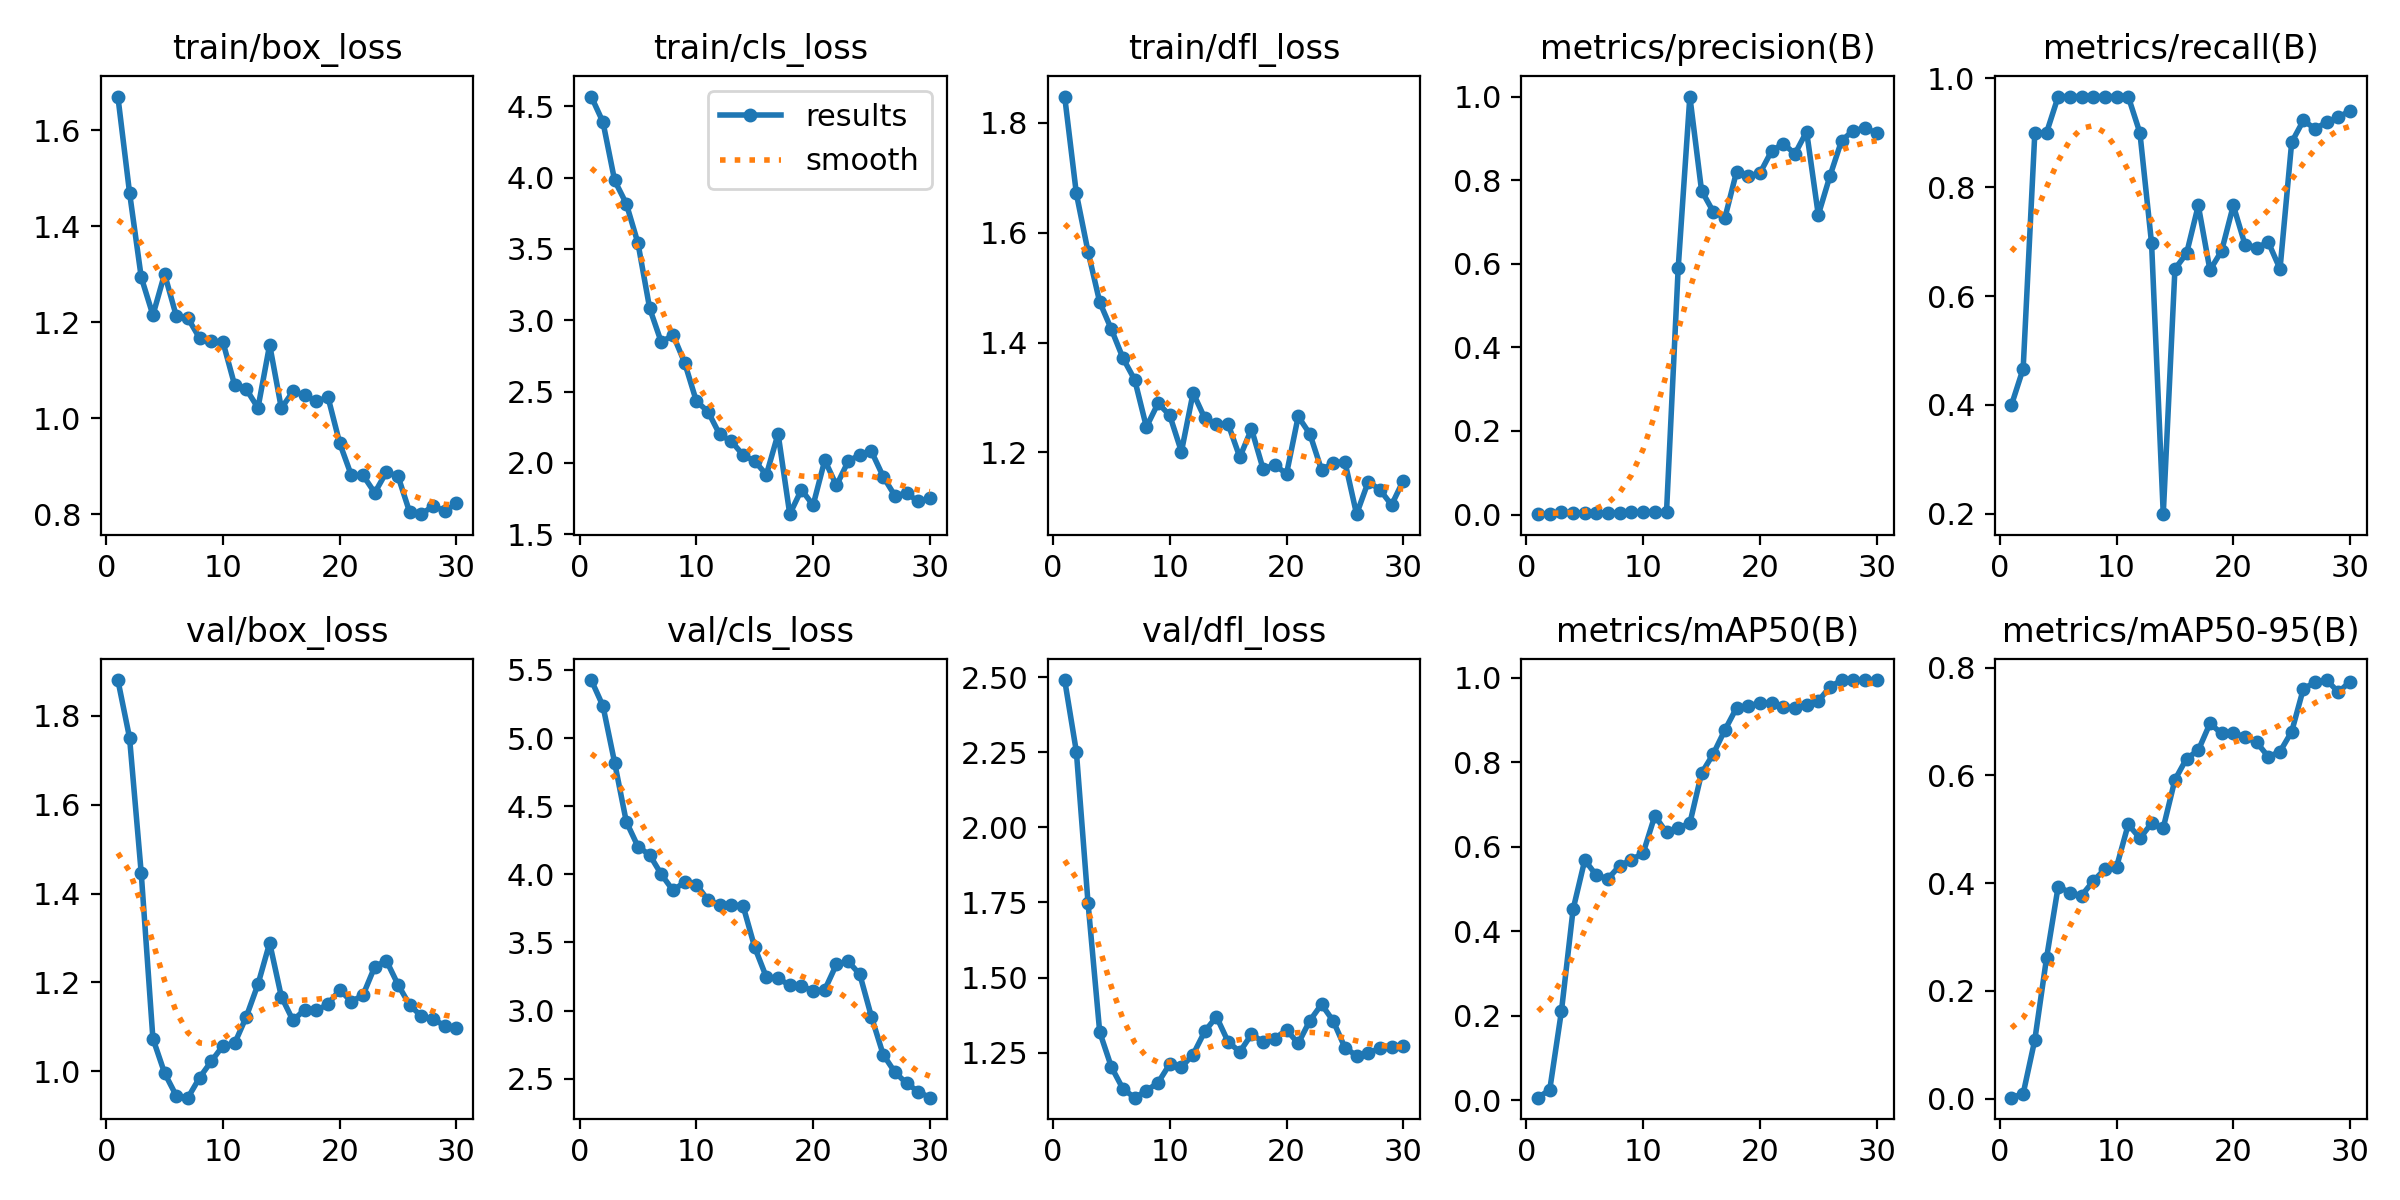

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=900)

## Val Batch0 Pred

/content


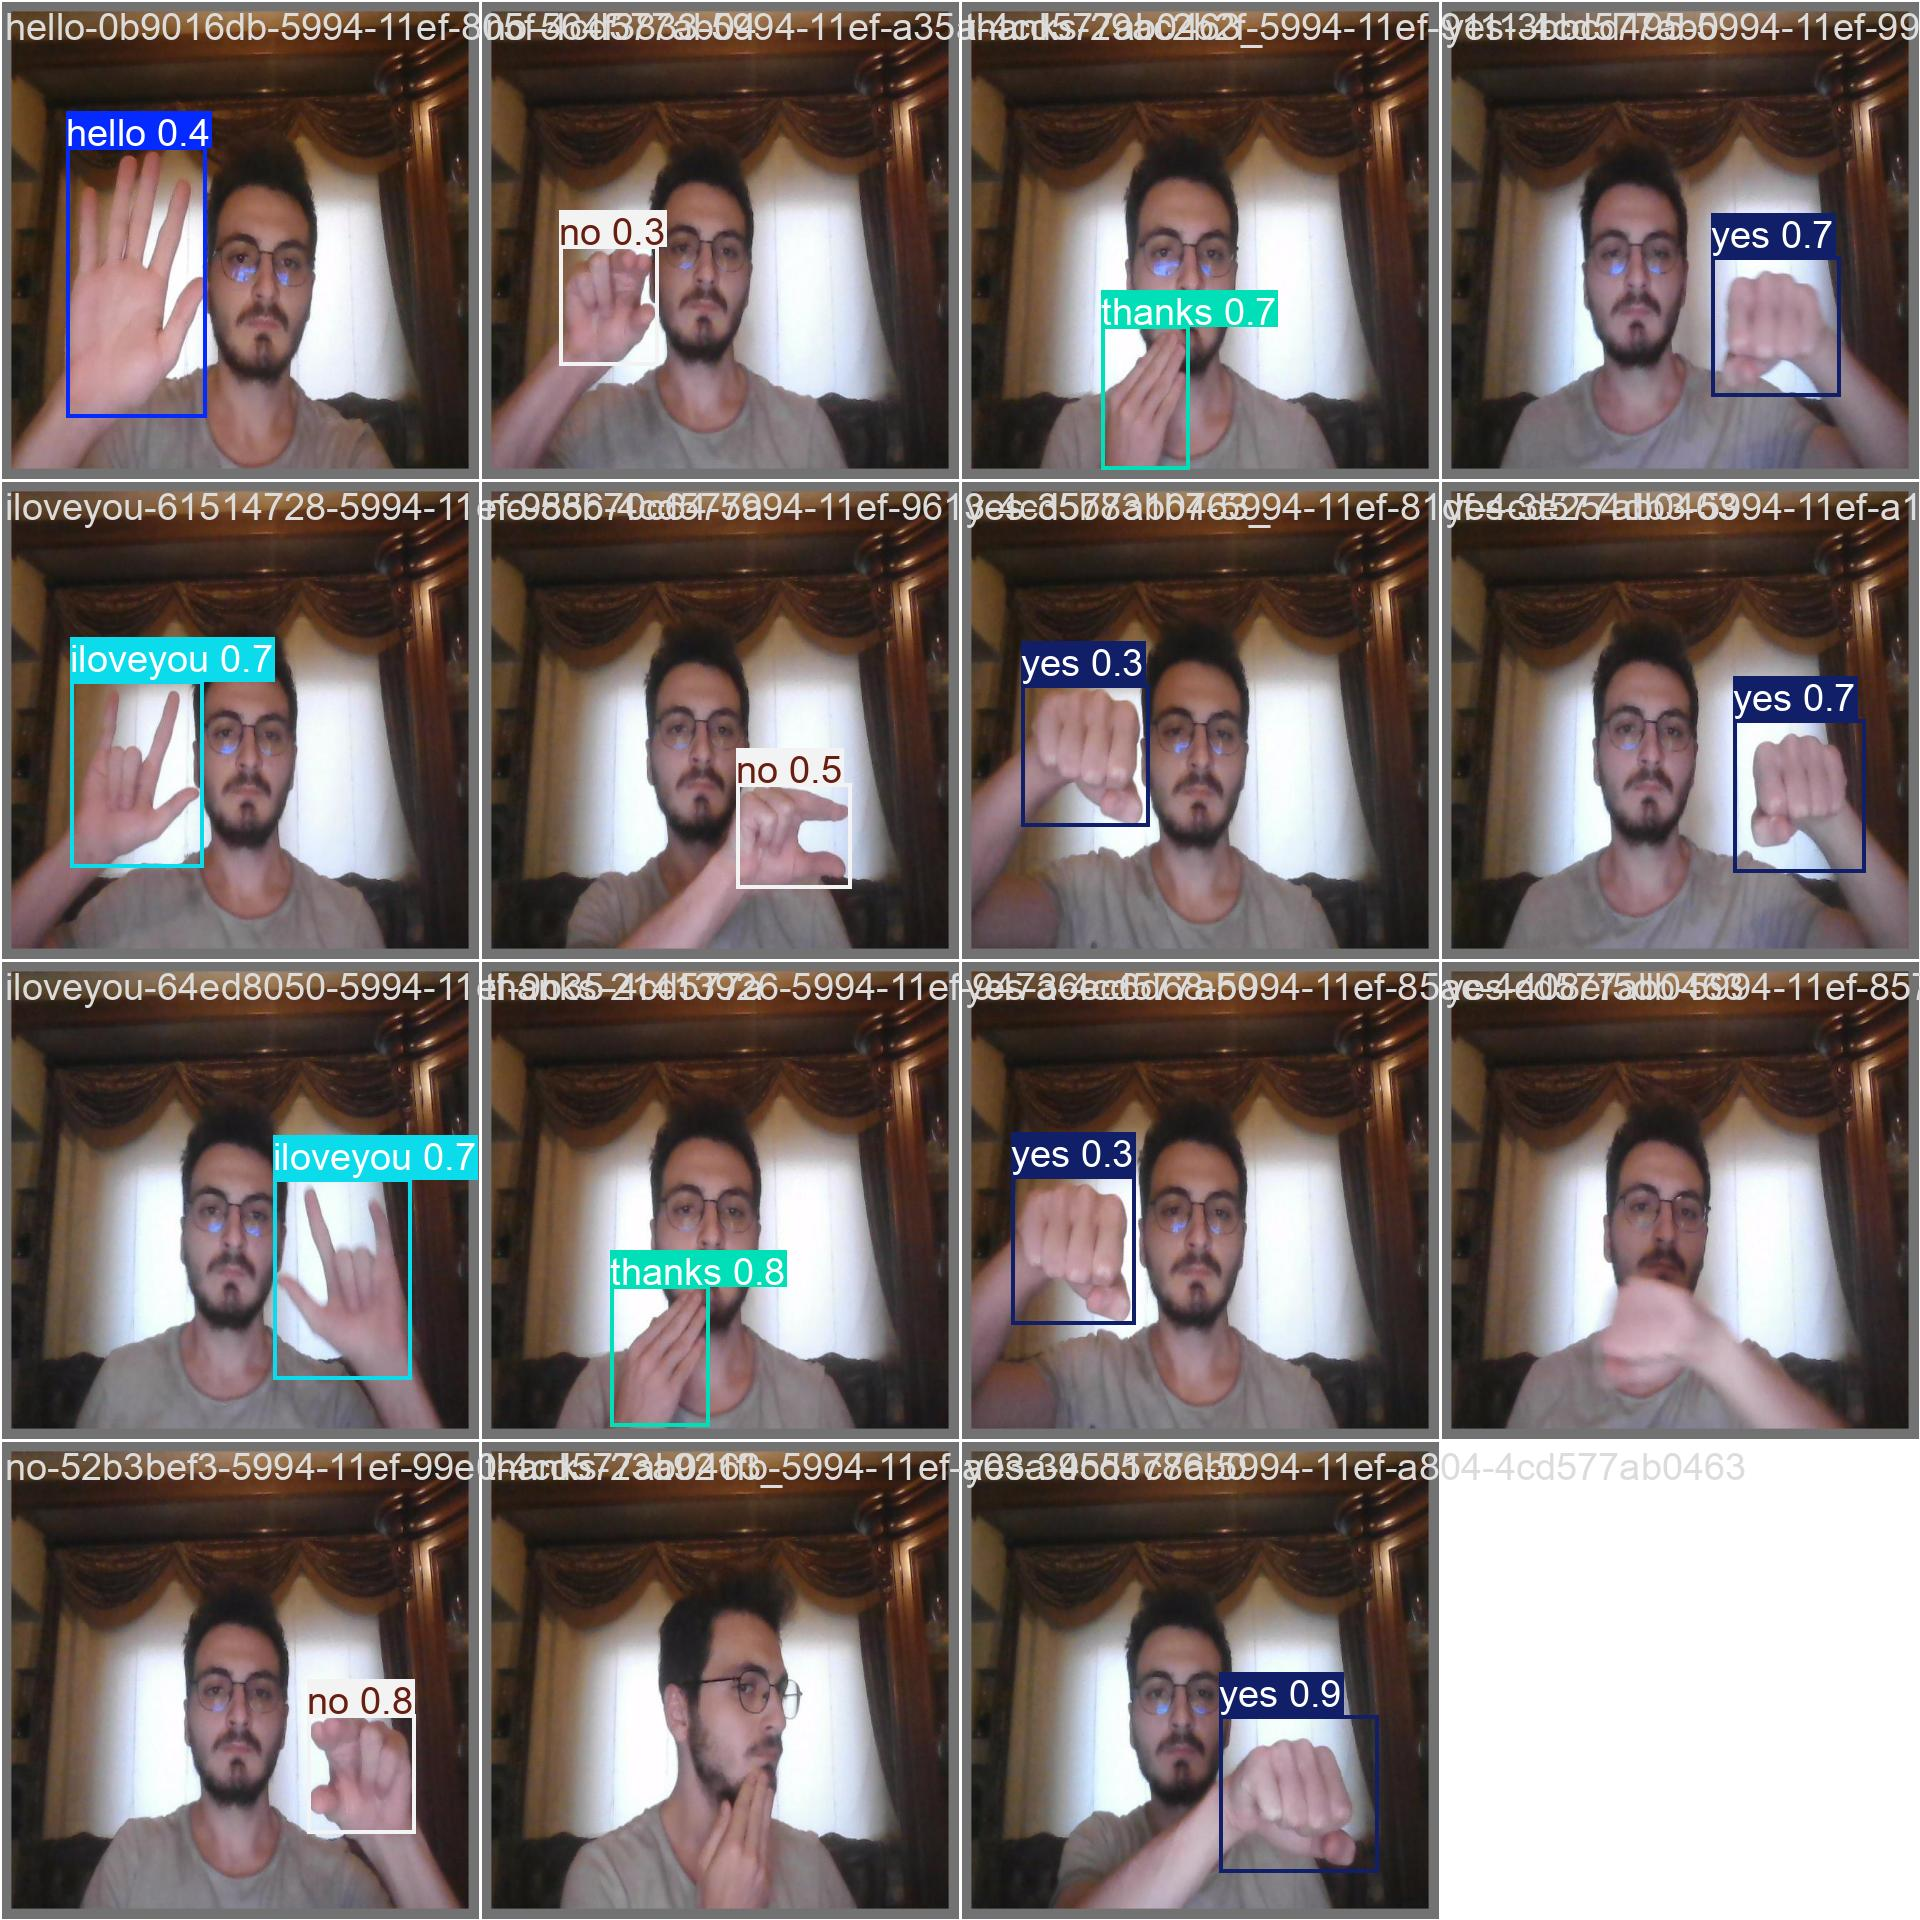

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=900)

## Validation the Model

A crucial phase in the machine learning process is validation, which enables you to evaluate the caliber of your learned models. Ultralytics YOLOv8's Val mode offers a comprehensive set of metrics and tools for assessing how well your object detection algorithms are working. This manual provides all the information you need to know how to utilize the Val mode efficiently and guarantee the accuracy and dependability of your models.

In [ ]:
# Load a model
model = YOLO("yolov8n.pt")  # load an official model
model = YOLO("/content/runs/detect/train2/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Sign-Language-Detection-2/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.60s/it]


                   all         15         15       0.92      0.922      0.995      0.777
                 hello          1          1      0.862          1      0.995      0.895
              iloveyou          2          2       0.79          1      0.995      0.796
                    no          3          3      0.946          1      0.995      0.763
                thanks          3          3          1      0.881      0.995      0.796
                   yes          6          6          1      0.731      0.995      0.634
Speed: 5.3ms preprocess, 281.4ms inference, 0.0ms loss, 11.5ms postprocess per image
Results saved to runs/detect/val


array([     0.8955,       0.796,     0.76302,       0.796,     0.63393])

In [ ]:
print(metrics.box.map)  # mAP50-95
print(metrics.box.map50)  # mAP50
print(metrics.box.map75)  # mAP75
print(metrics.box.maps)  # list of mAP50-95 for each category

0.7768916946791709
0.9949999999999999
0.9352842459173871
[     0.8955       0.796     0.76302       0.796     0.63393]


## Predict New Images (epoch=30)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/pred

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/5 /content/pred/hello_pred.jpg: 384x640 1 iloveyou, 152.5ms
image 2/5 /content/pred/iloveyou_pred.jpg: 384x640 1 iloveyou, 131.0ms
image 3/5 /content/pred/no_pred.jpg: 384x640 (no detections), 126.7ms
image 4/5 /content/pred/thanks_pred.jpg: 384x640 1 thanks, 128.4ms
image 5/5 /content/pred/yes_pred.jpg: 384x640 (no detections), 130.3ms
Speed: 3.9ms preprocess, 133.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


### I had some issues

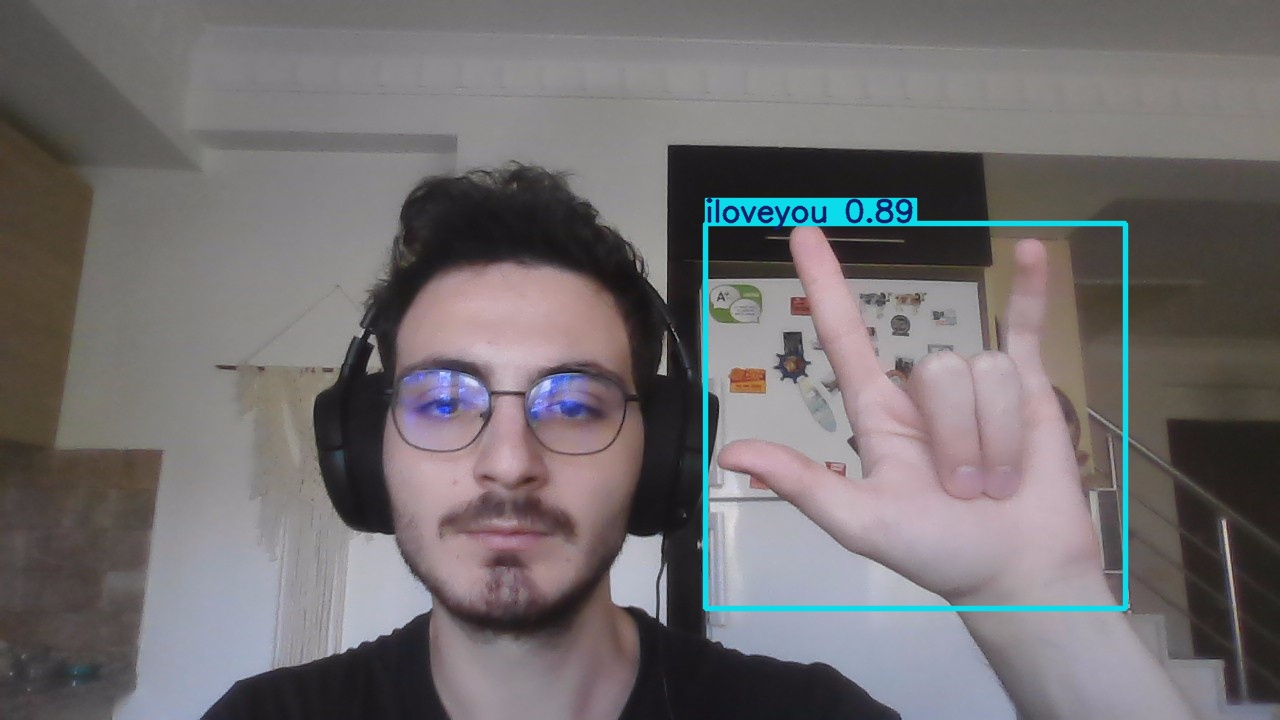

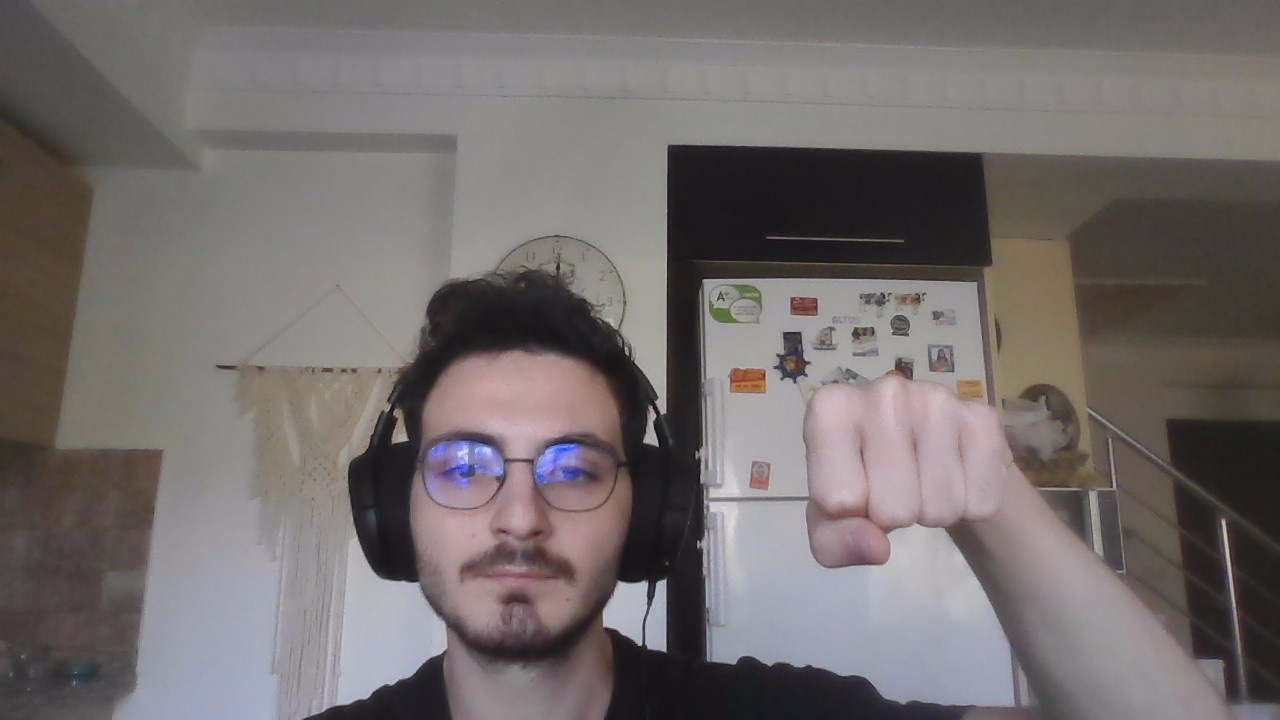

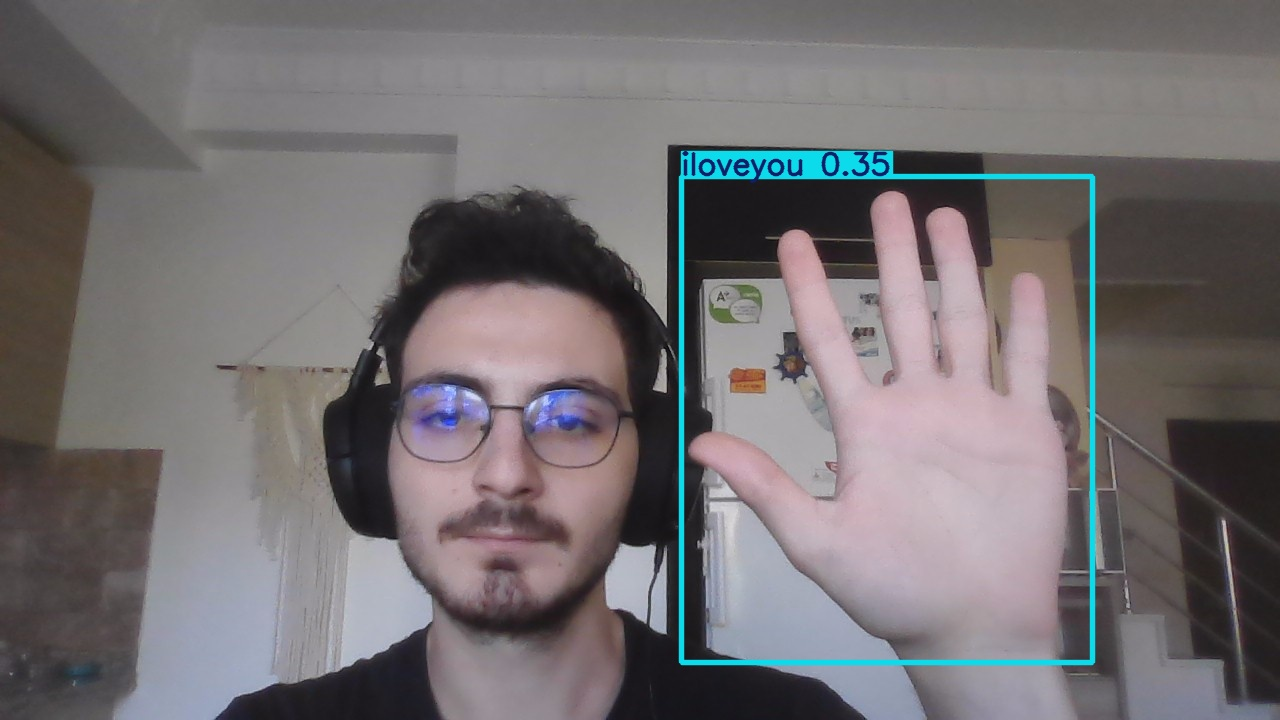

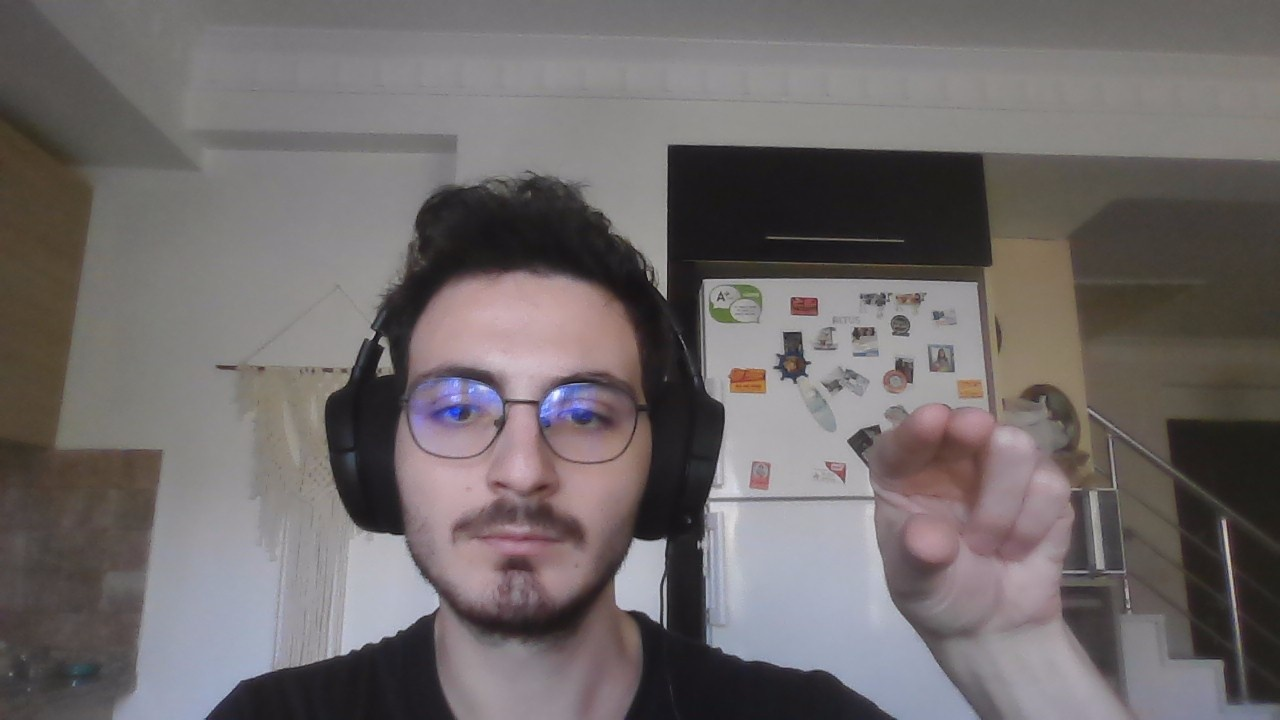

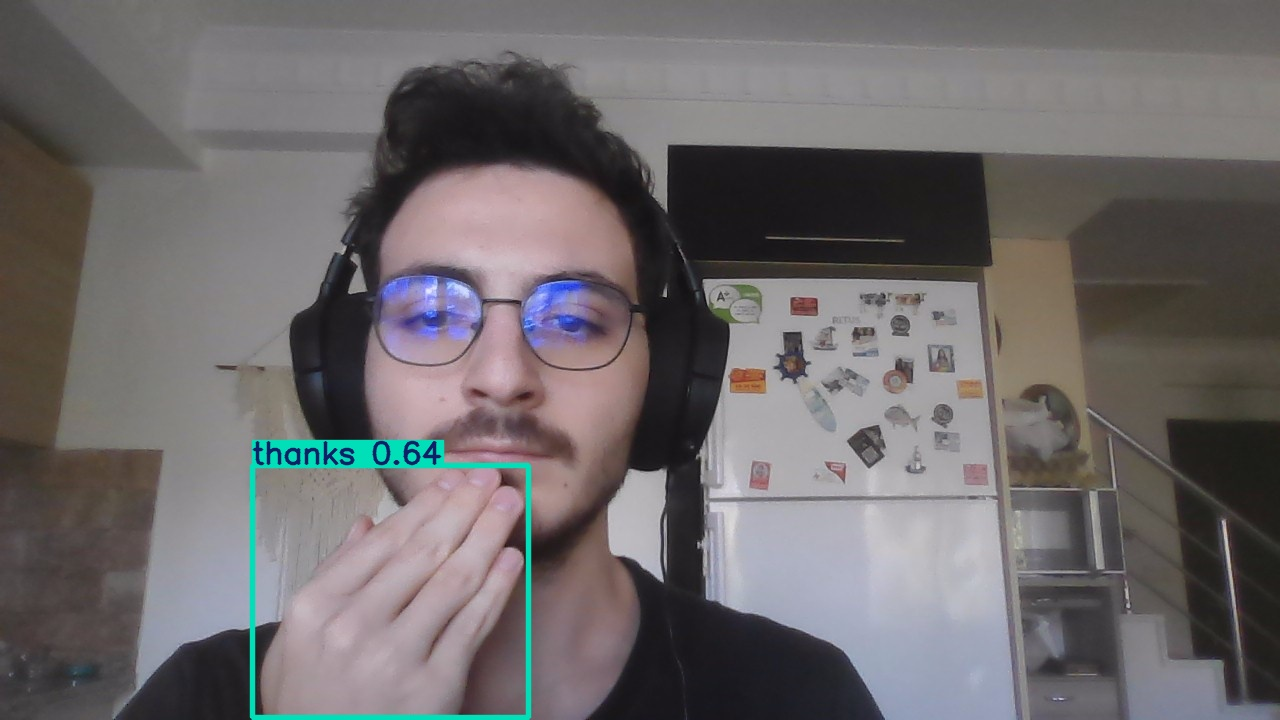

In [ ]:
for filename in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[0:5]:
  display(Image(filename))
  print("\n")

# Train3 (second time trained)

## Confusion Matrix

/content


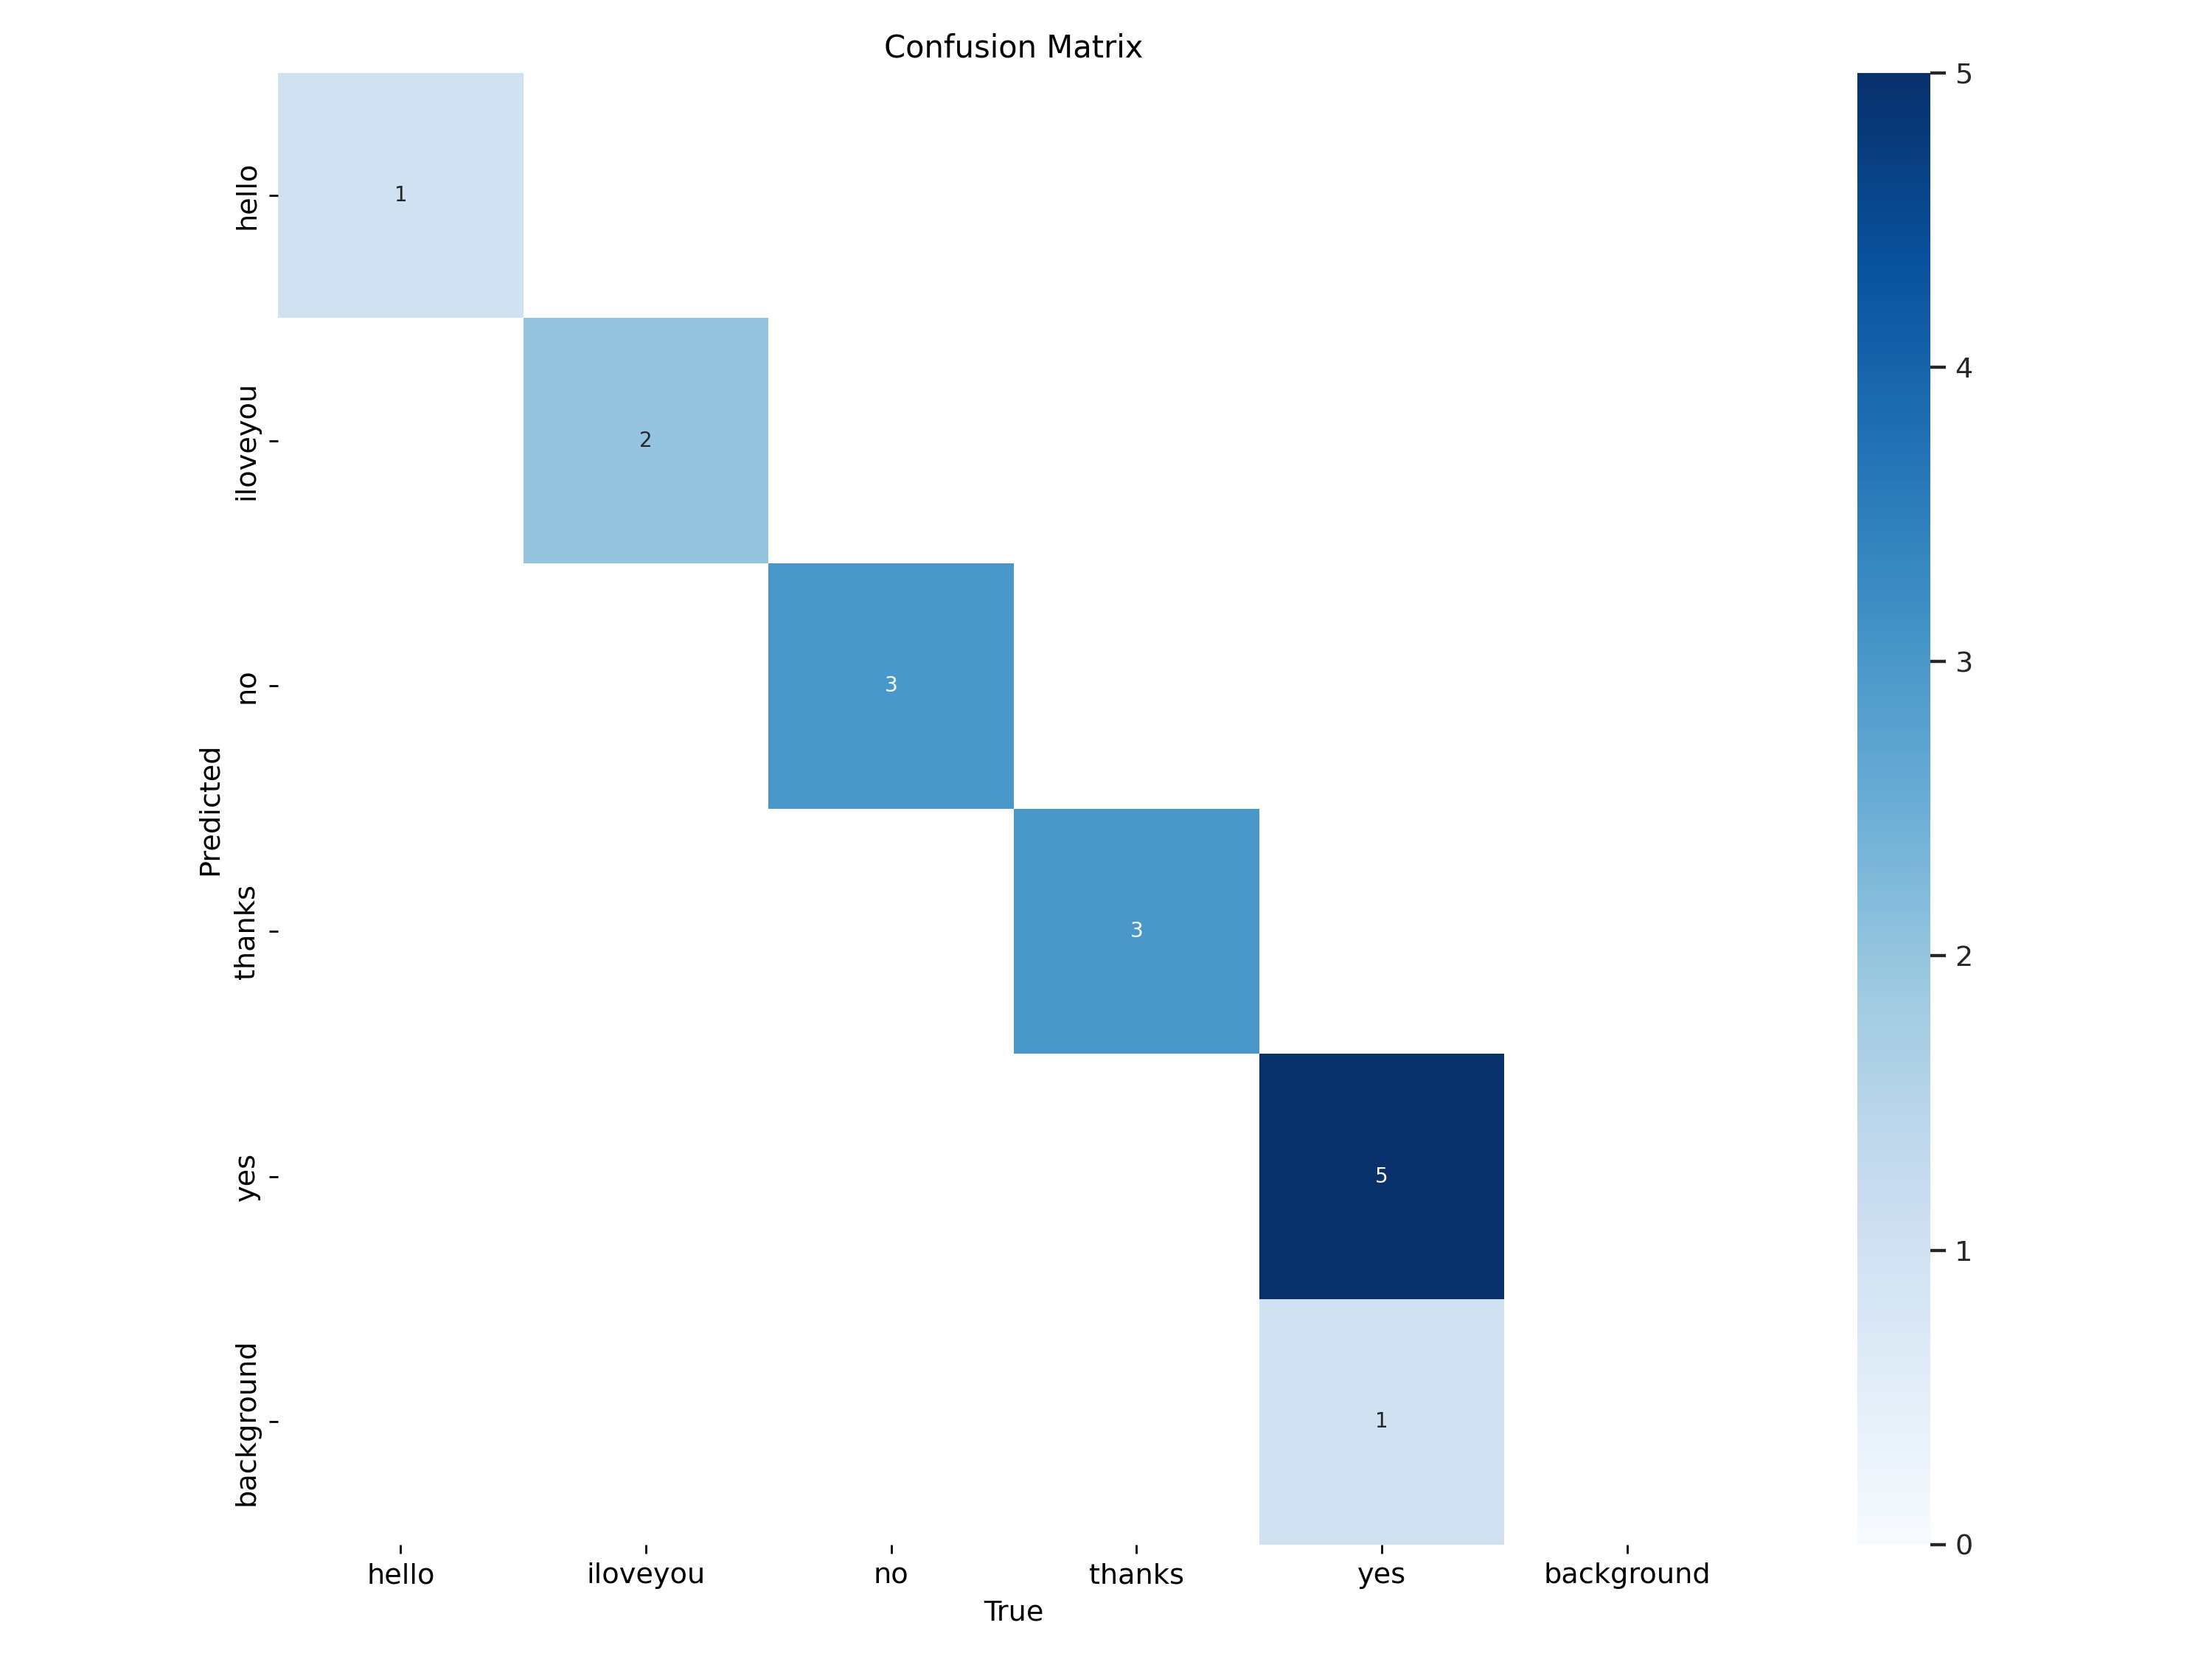

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=900)

## Training and Validation Loss

/content


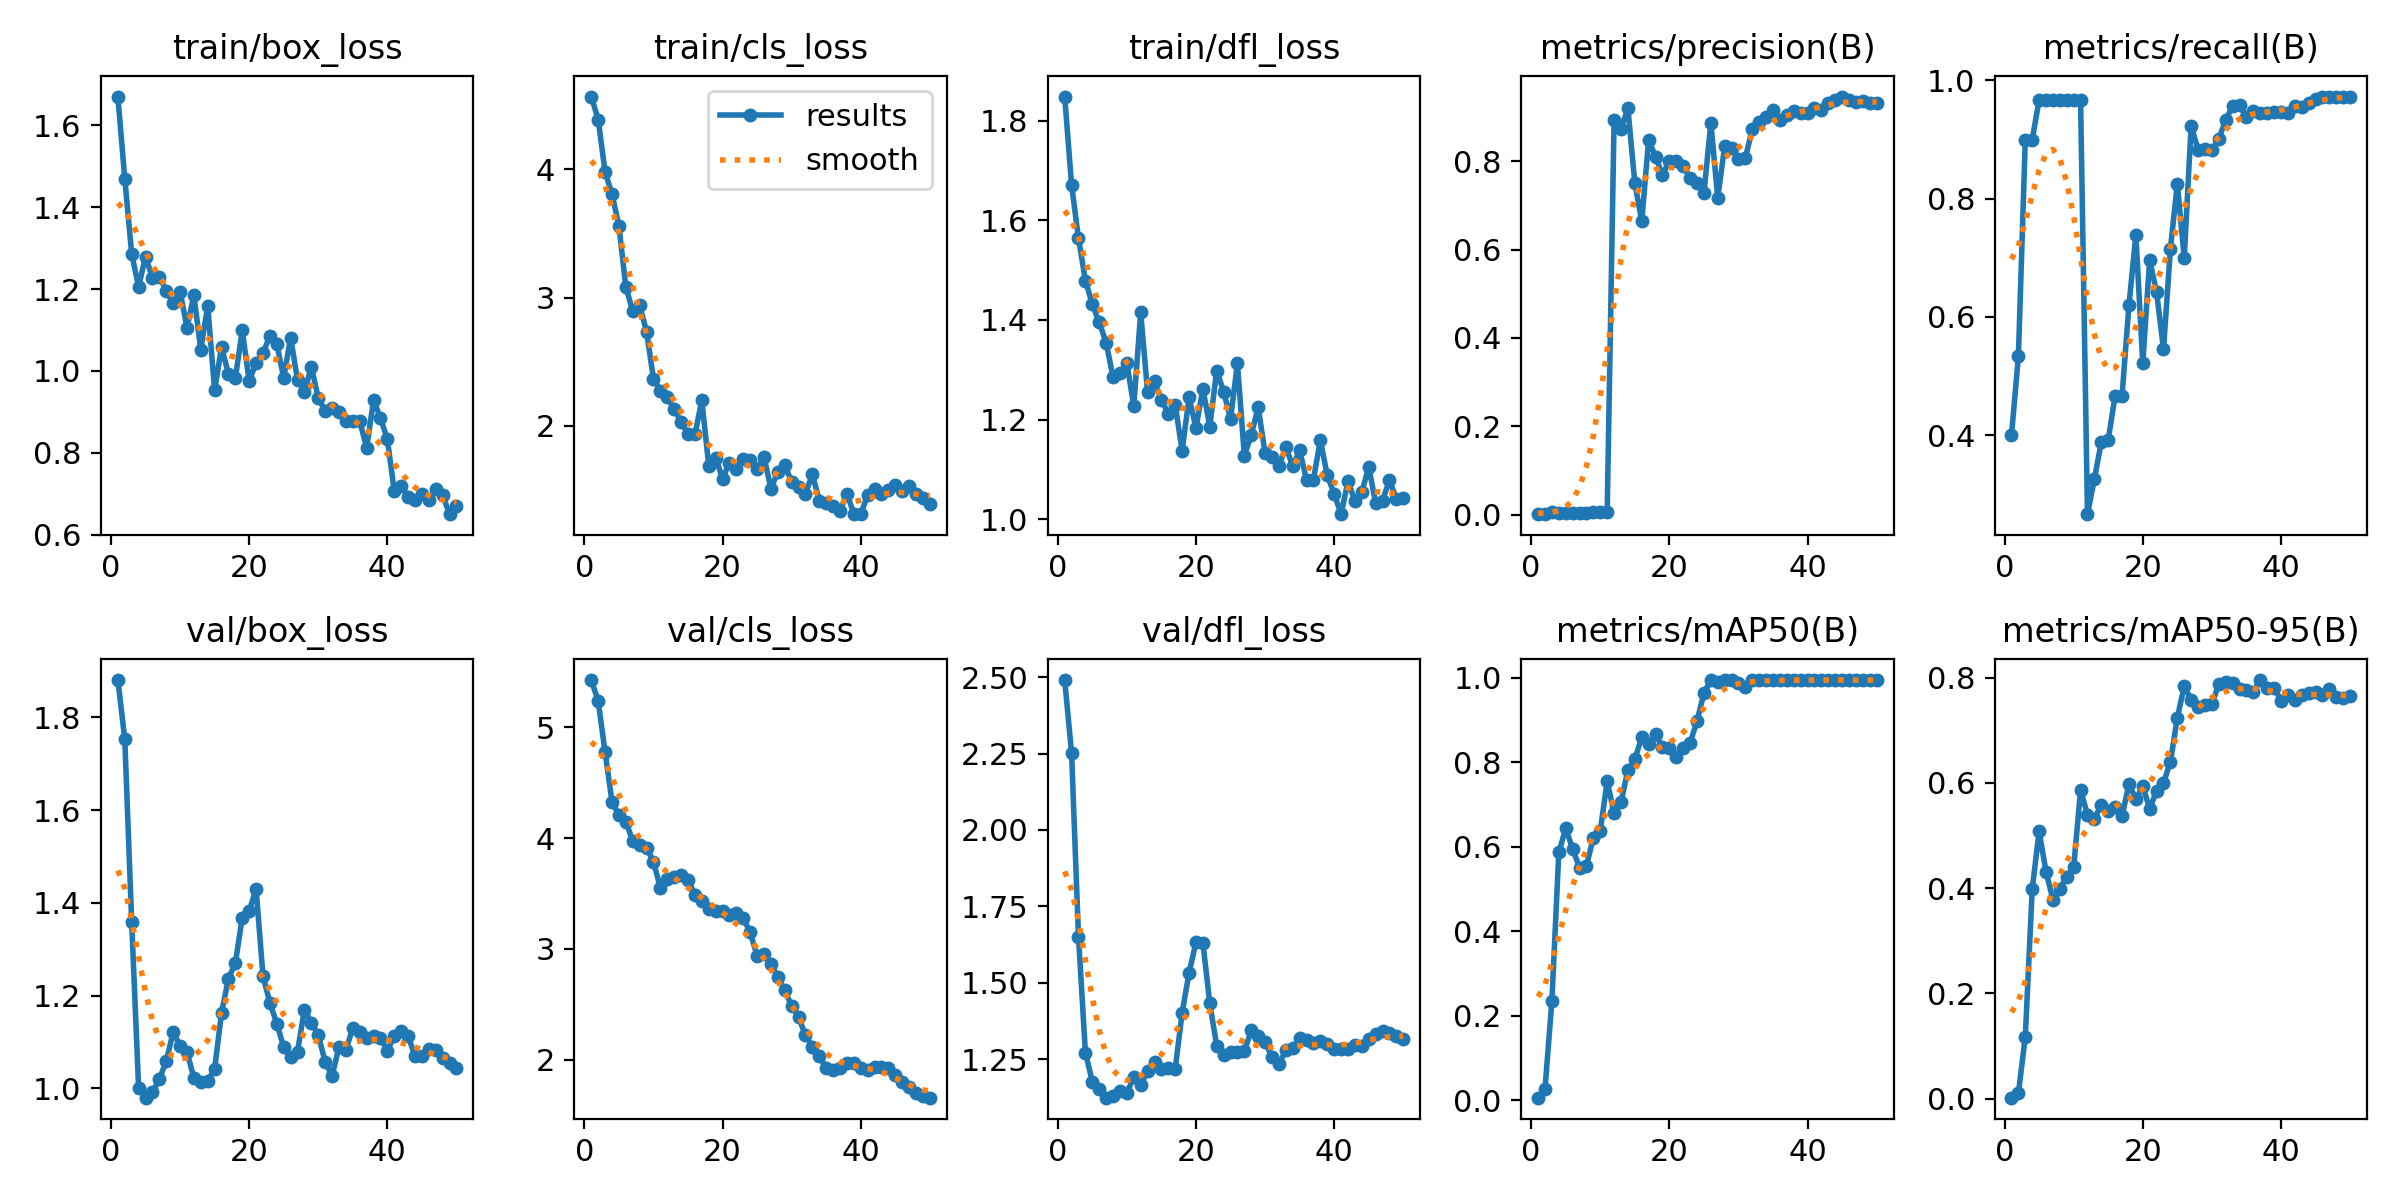

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=900)

## Val Batch0 Pred

/content


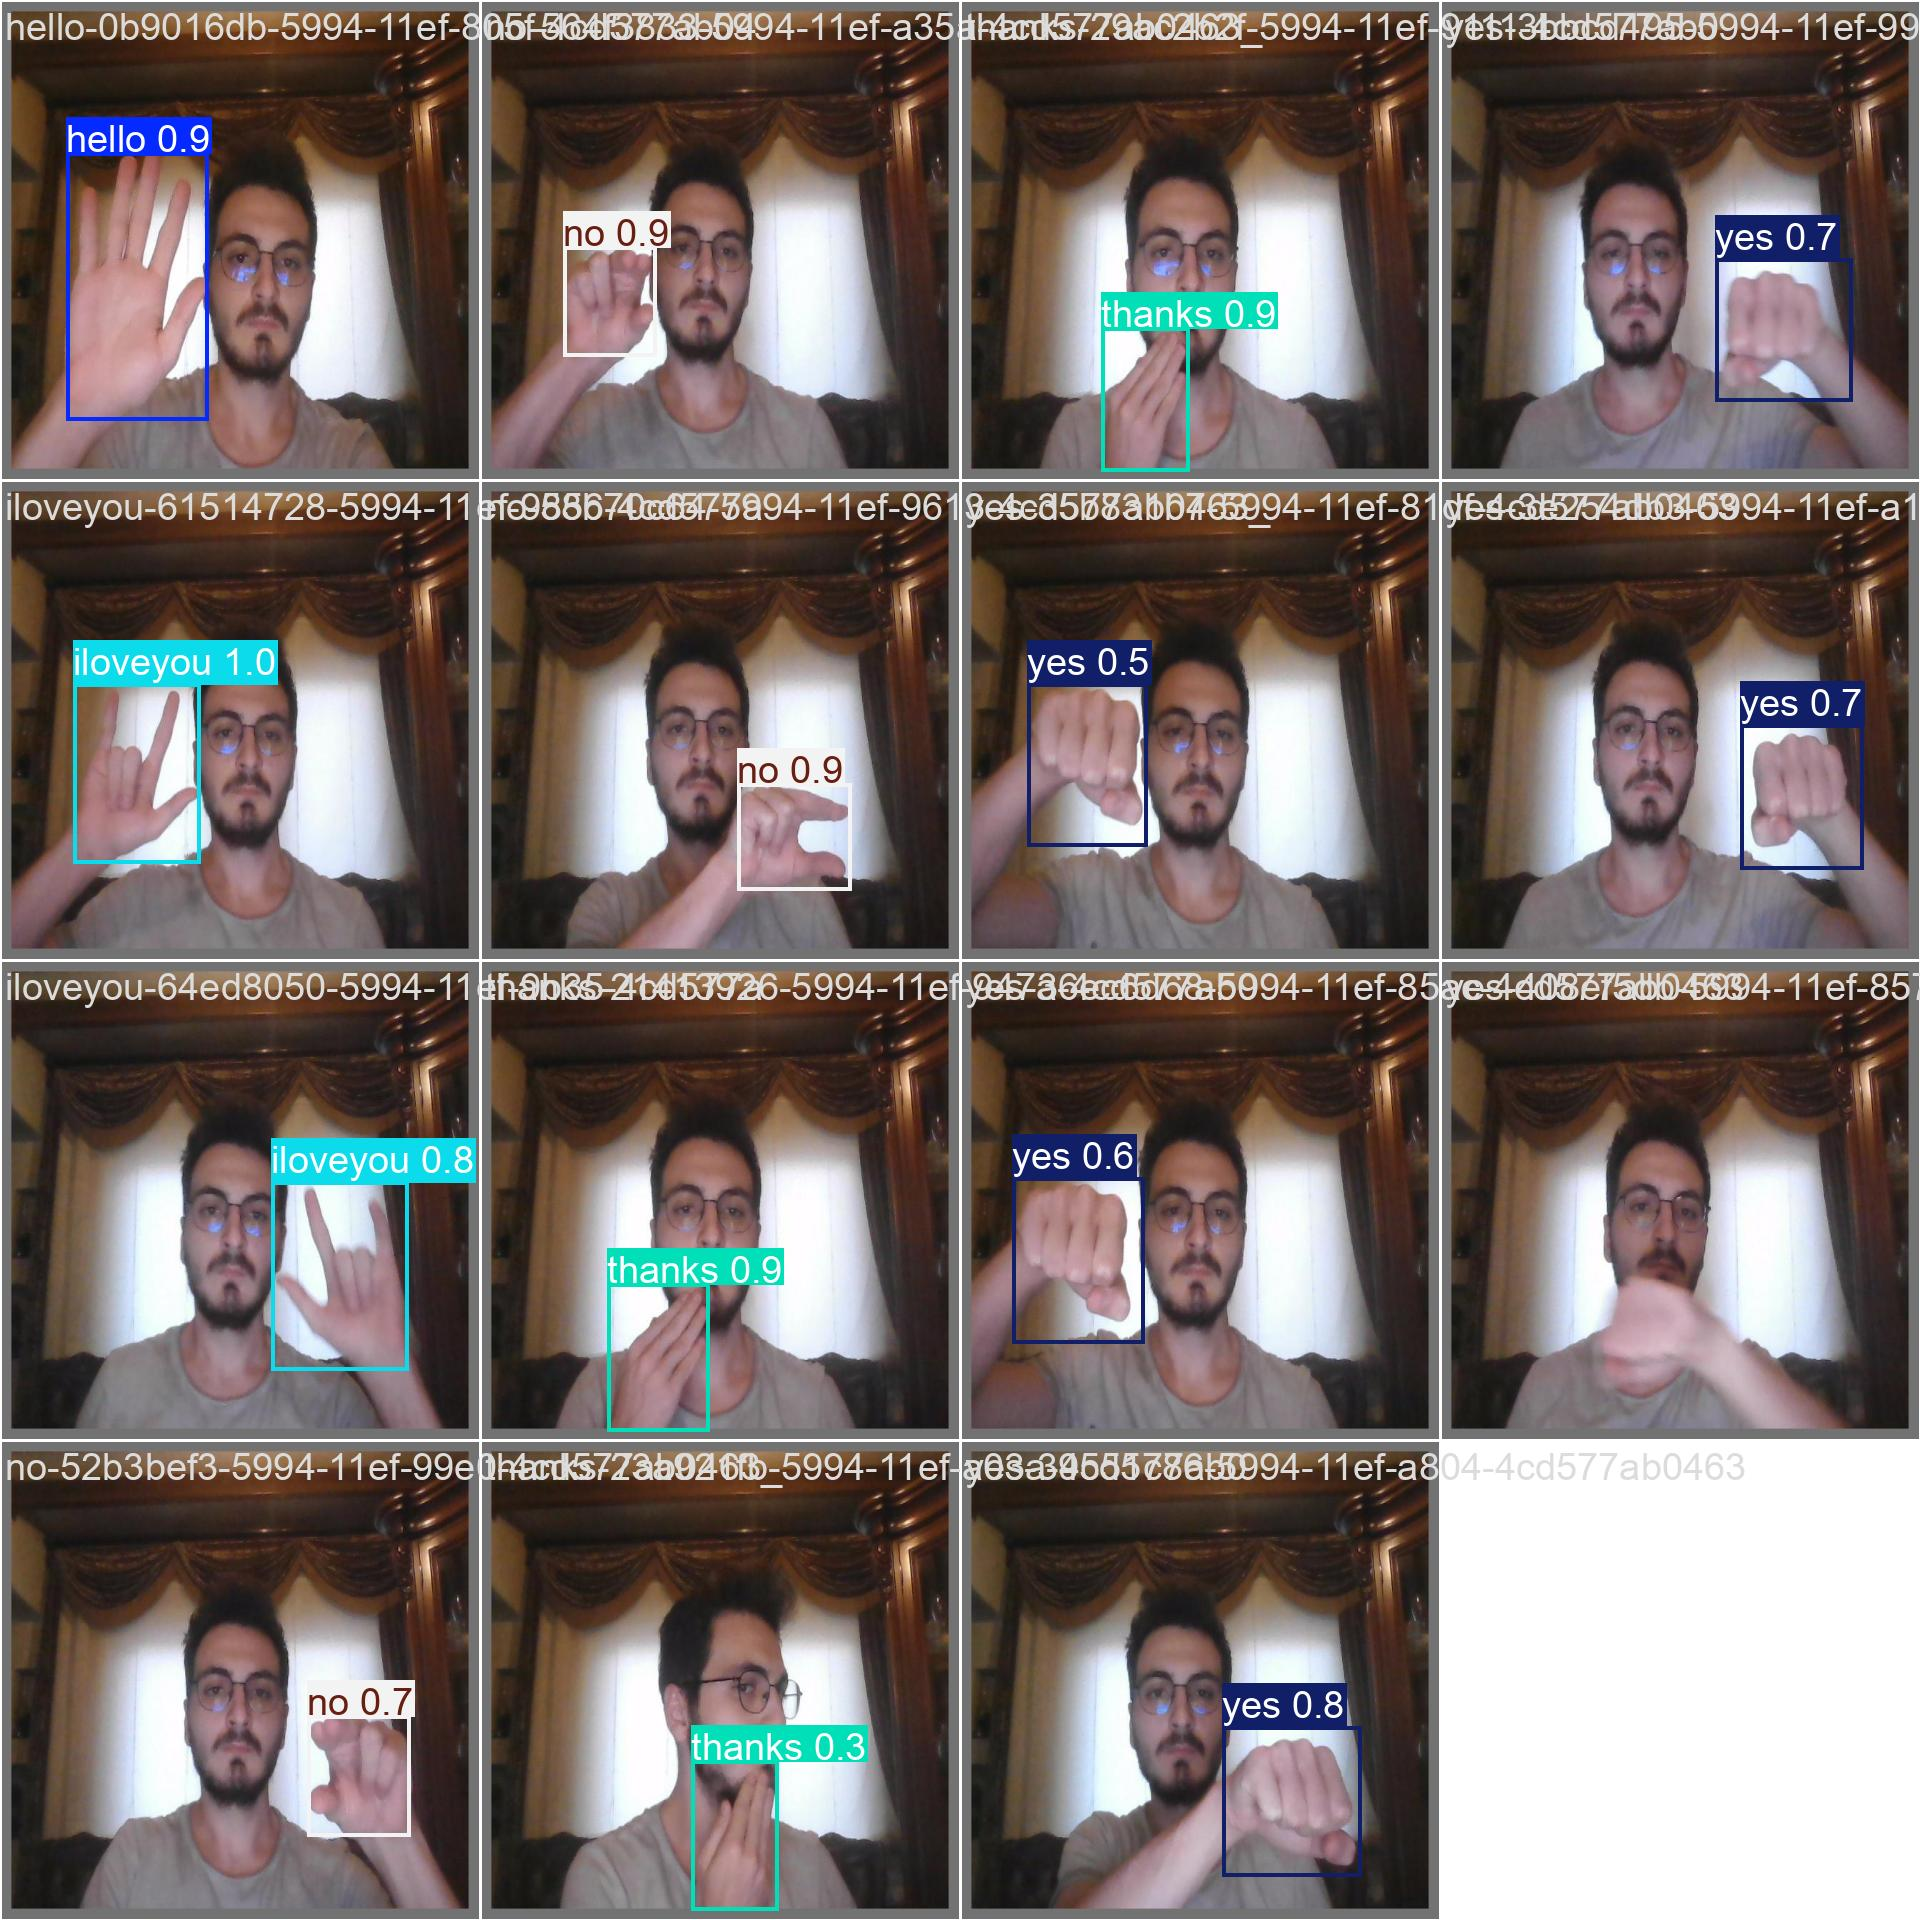

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=900)

## Predict New Image (epoch=50)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.25 source=/content/pred

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/5 /content/pred/hello_pred.jpg: 384x640 1 hello, 135.9ms
image 2/5 /content/pred/iloveyou_pred.jpg: 384x640 1 iloveyou, 121.9ms
image 3/5 /content/pred/no_pred.jpg: 384x640 1 no, 120.8ms
image 4/5 /content/pred/thanks_pred.jpg: 384x640 1 thanks, 119.4ms
image 5/5 /content/pred/yes_pred.jpg: 384x640 1 yes, 132.9ms
Speed: 3.2ms preprocess, 126.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


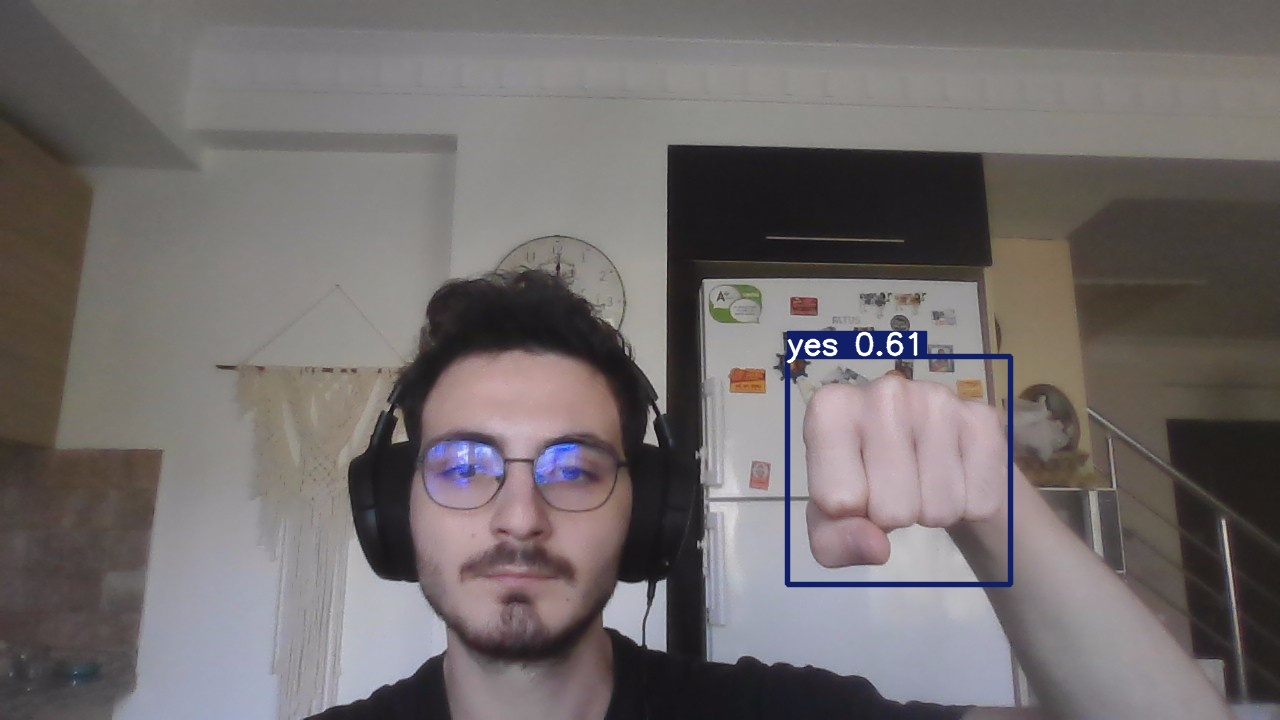

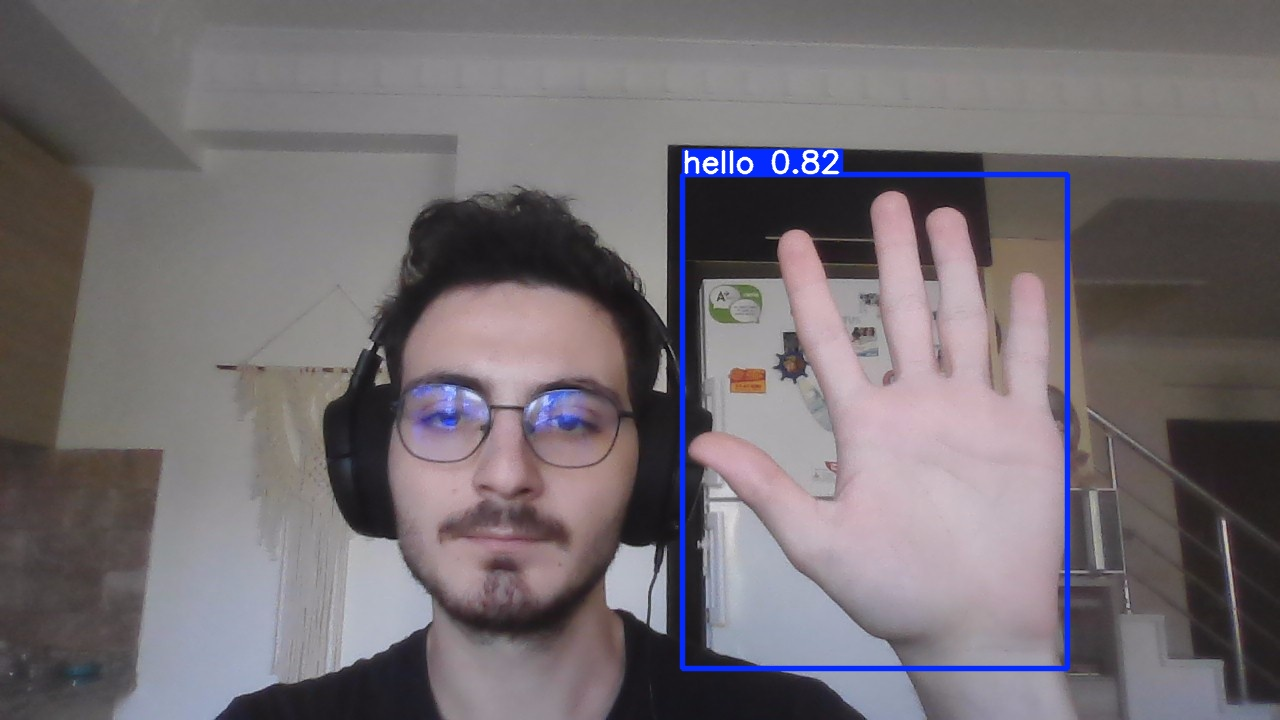

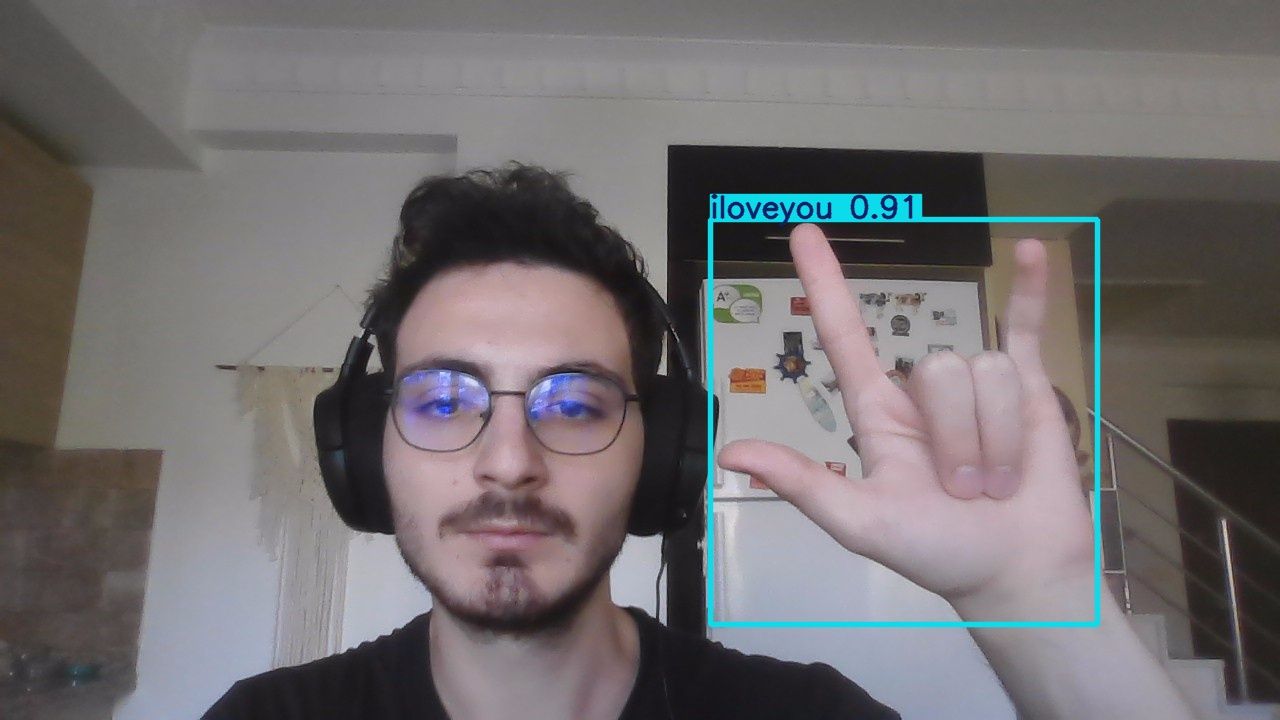

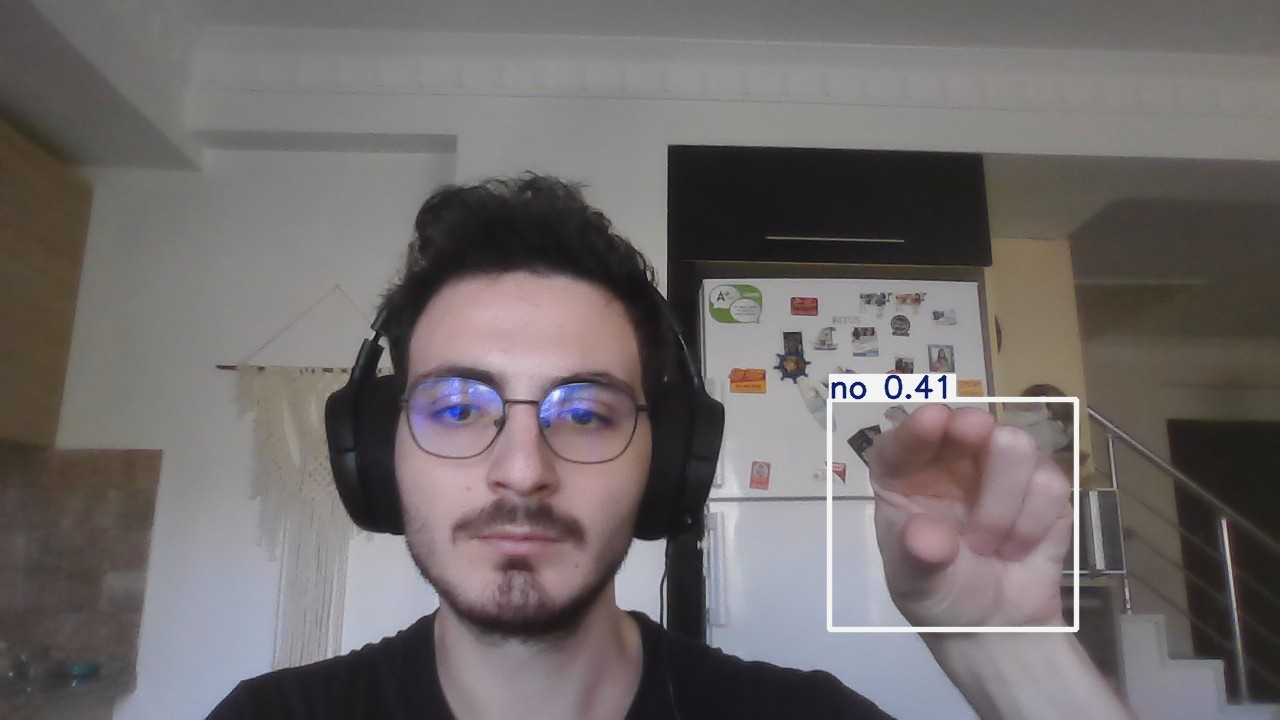

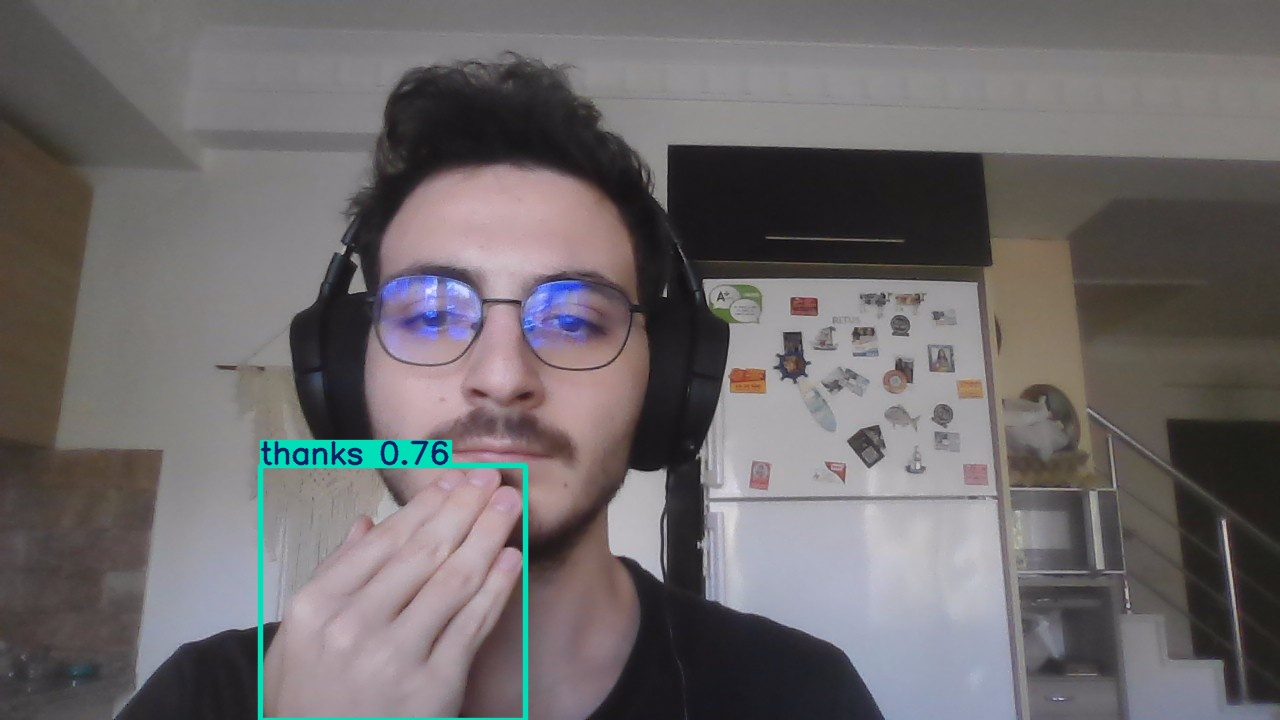

In [ ]:
for filename in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[0:5]:
  display(Image(filename))
  print("\n")

# Train (third time trained)

## Predict

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Colab\ Notebooks/SignLanguageDetection/pred

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/5 /content/drive/MyDrive/Colab Notebooks/SignLanguageDetection/pred/hello_pred.jpg: 384x640 1 hello, 204.9ms
image 2/5 /content/drive/MyDrive/Colab Notebooks/SignLanguageDetection/pred/iloveyou_pred.jpg: 384x640 1 iloveyou, 155.1ms
image 3/5 /content/drive/MyDrive/Colab Notebooks/SignLanguageDetection/pred/no_pred.jpg: 384x640 1 no, 166.4ms
image 4/5 /content/drive/MyDrive/Colab Notebooks/SignLanguageDetection/pred/thanks_pred.jpg: 384x640 1 thanks, 171.7ms
image 5/5 /content/drive/MyDrive/Colab Notebooks/SignLanguageDetection/pred/yes_pred.jpg: 384x640 1 yes, 156.4ms
Speed: 4.8ms preprocess, 170.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


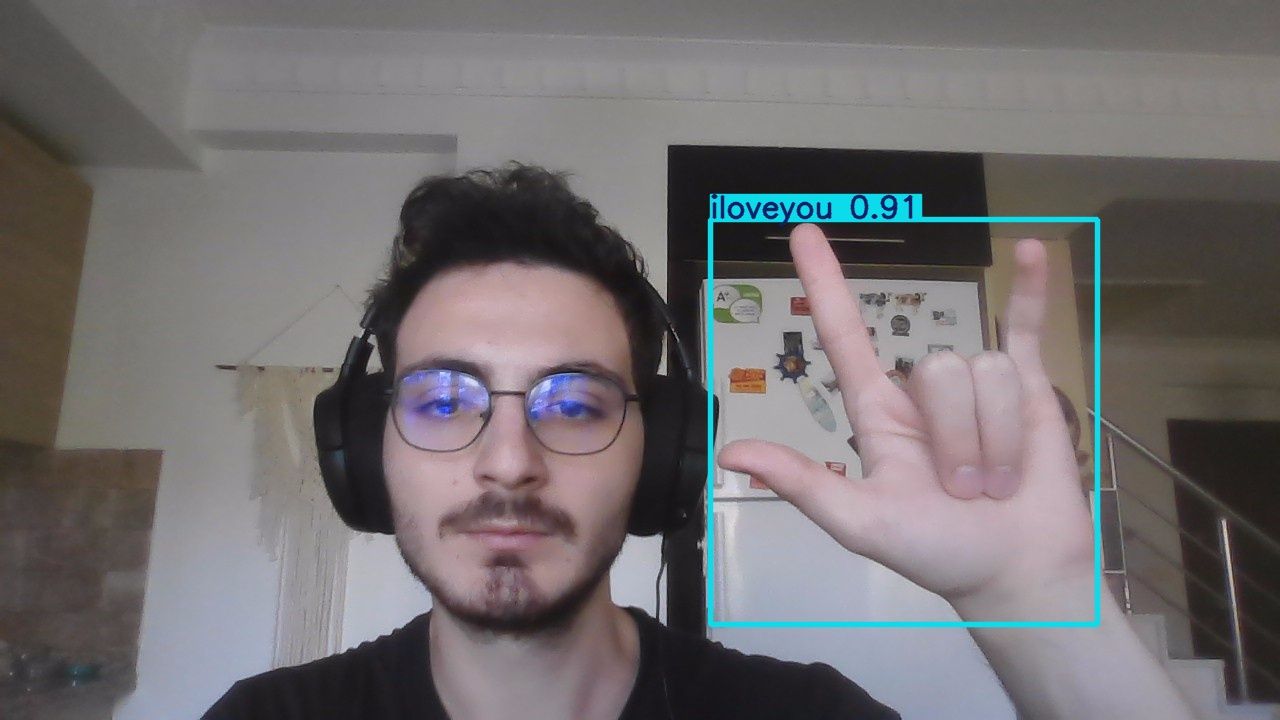

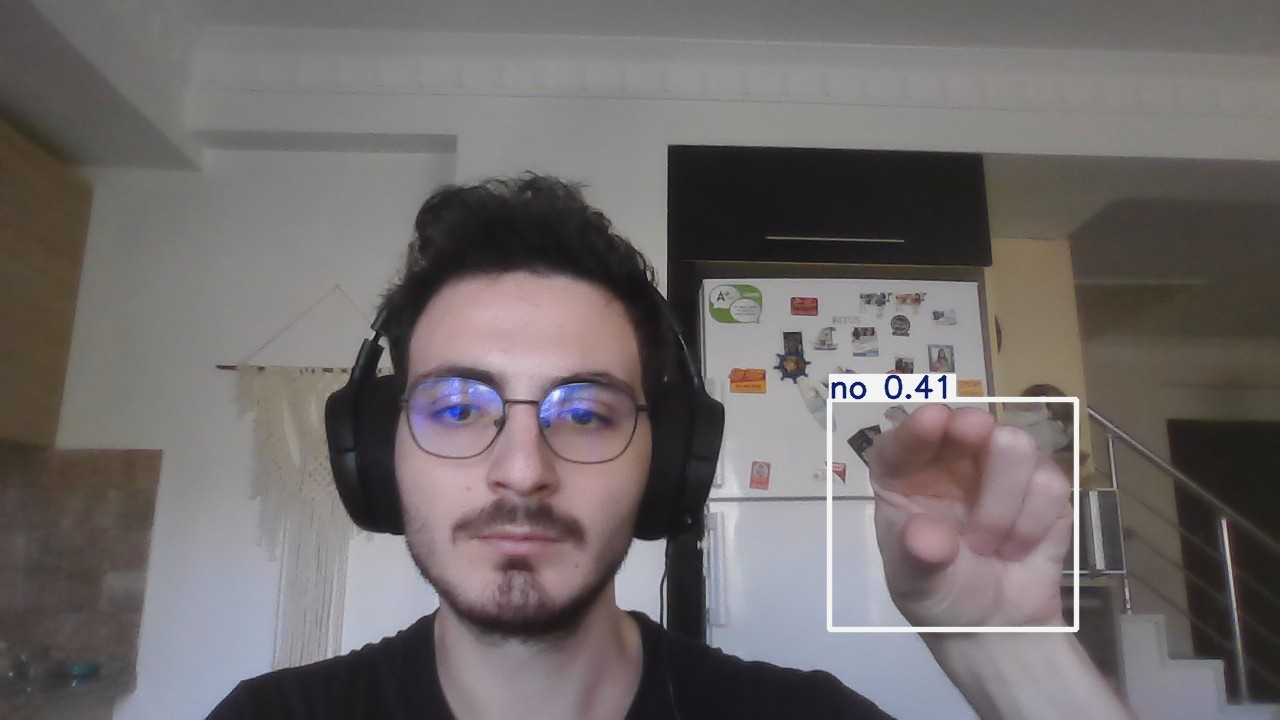

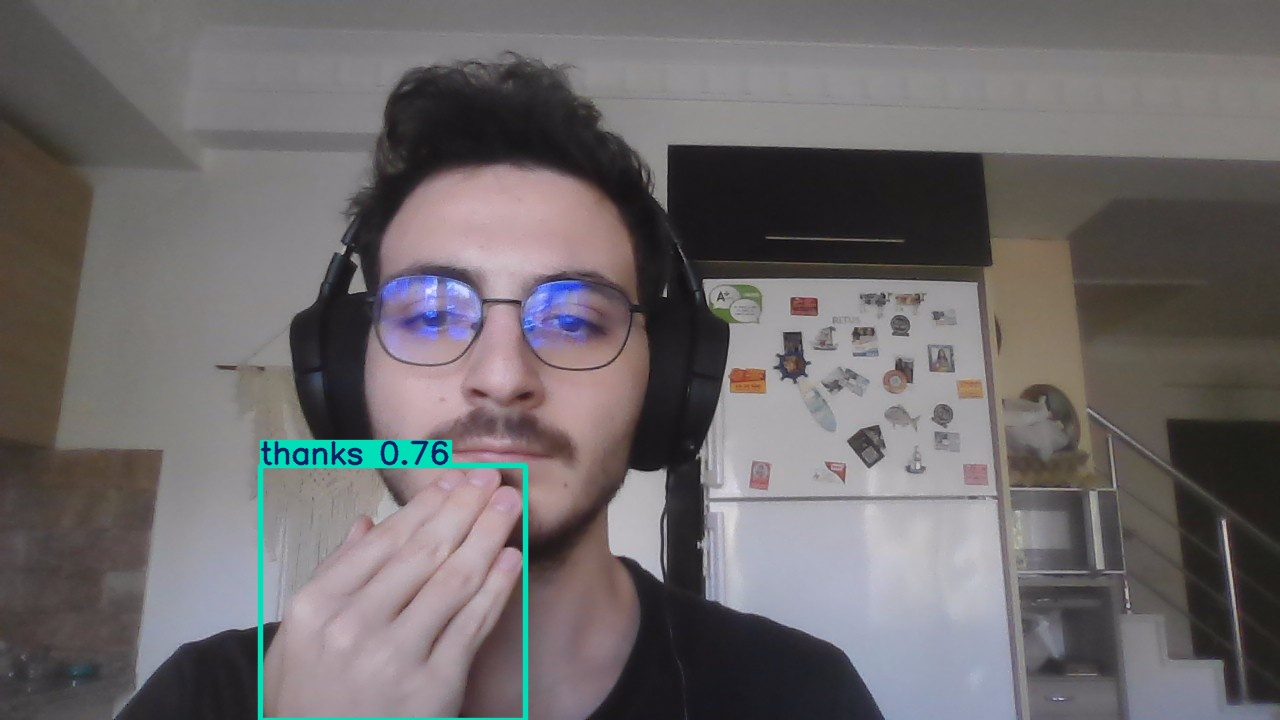

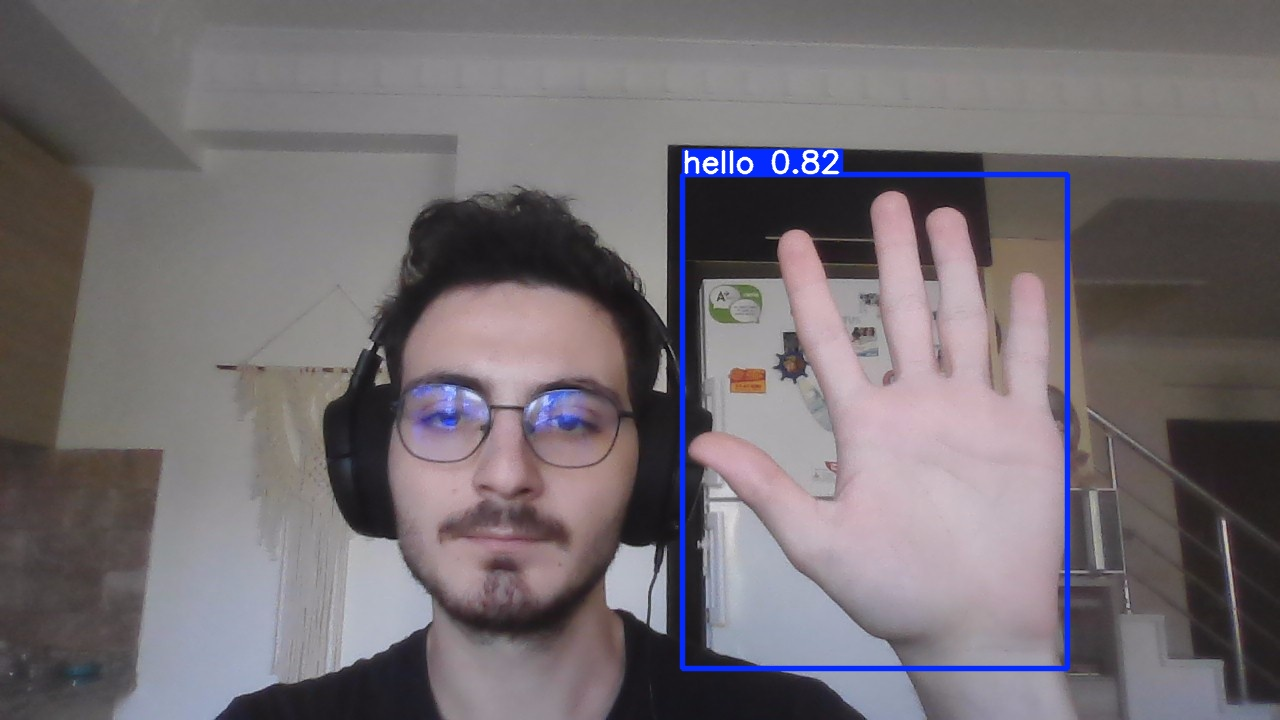

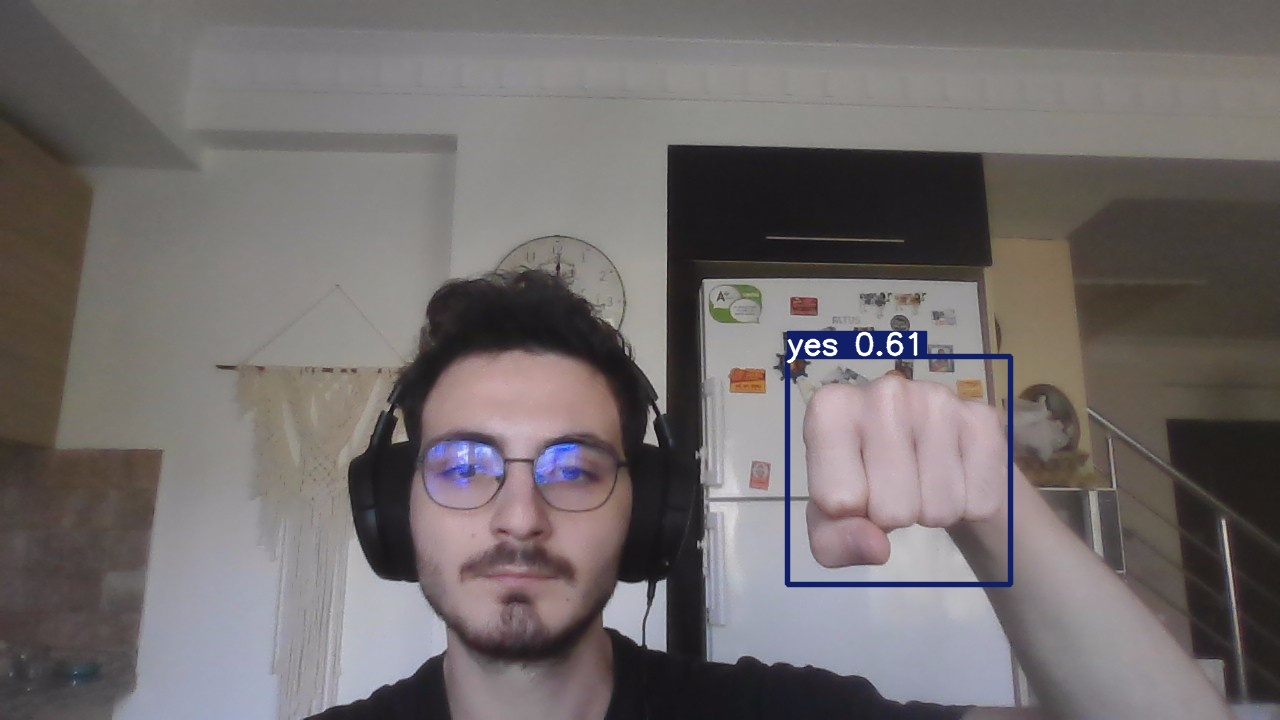

In [ ]:
for filename in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[0:5]:
  display(Image(filename))
  print("\n")

# Using Webcam Photo

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

## Helper Functions

### Take photo

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

# Function to capture a photo using the webcam and save it
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

### Function to perform inference on the captured image

In [ ]:
from PIL import Image as PILImage  # Import PIL Image with an alias

# Function to perform inference on the captured image and display results with bounding boxes and labels
def predict_sign_language(image_path, model):
    results = model(image_path)  # Perform inference

    for result in results:
        result_image = result.plot()  # Plot results with bounding boxes and labels
        display(PILImage.fromarray(result_image))  # Convert result to an image array and display it
        result.save()  # Save the result with bounding boxes and labels

    return results

### Capture the photo

<IPython.core.display.Javascript object>

Saved to photo.jpg


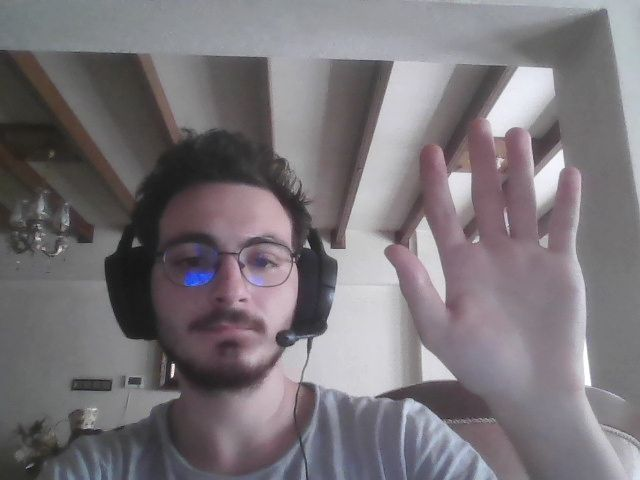


image 1/1 /content/photo.jpg: 480x640 1 hello, 207.1ms
Speed: 4.5ms preprocess, 207.1ms inference, 9.0ms postprocess per image at shape (1, 3, 480, 640)


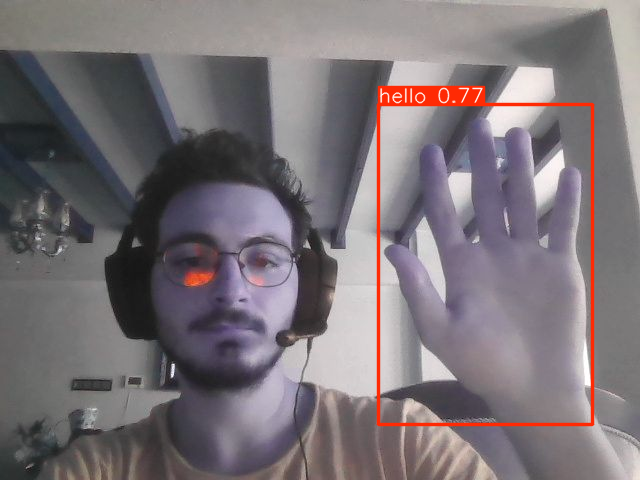

In [ ]:
# Capture and predict sign language from the photo
try:
    filename = take_photo()  # Capture the photo
    print('Saved to {}'.format(filename))
    display(Image(filename))  # Display the captured image

    # Predict the sign language from the captured image using the loaded model
    results = predict_sign_language(filename, model)

except Exception as err:
    print("Error:", str(err))

# Webcam video (in progress)

## Needed Functions

In [ ]:
import cv2
import numpy as np
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from ultralytics import YOLO

# Initialize the YOLO model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # Replace with your trained model if needed

def js_to_image(js_reply):
    """Convert Javascript base64 data to OpenCV image."""
    image_bytes = b64decode(js_reply.split(',')[1])
    nparr = np.frombuffer(image_bytes, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

def bbox_to_bytes(bbox_array):
    """Convert OpenCV array (with bbox overlay) to base64 byte string."""
    _, buffer = cv2.imencode('.png', bbox_array)
    bbox_bytes = b64encode(buffer).decode('utf-8')
    return bbox_bytes

def video_stream():
    """Javascript to properly create our live video stream using our webcam as input."""
    js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.5)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640;
      captureCanvas.height = 480;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')
    display(js)

def video_frame(label, bbox):
    js_code = f'stream_frame("{label}", "{bbox.decode()}")' if bbox else f'stream_frame("{label}", "")'
    data = eval_js(js_code)
    return data

## Video Capturing

In [ ]:
def process_frame(frame):
    results = model(frame)

    if results[0].boxes:
        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            cls = int(box.cls[0])
            label = f"{model.names[cls]} {conf:.2f}"
            frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            frame = cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame

In [ ]:
# Start streaming video from webcam
video_stream()
label_html = 'Capturing...'
bbox = ''
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    frame = js_to_image(js_reply["img"])

    # Process frame to detect objects and draw bounding boxes
    frame = process_frame(frame)

    # Convert frame to bytes for display
    bbox_bytes = bbox_to_bytes(frame)
    bbox = bbox_bytes